# UTBK Recommendation System
- Authors: Gian Luky S. & Daud Muhamad A.
- Date: October 2023

Analyze try-out scom. res using unsupervised and supervised machine learning to provide tailored study strategies by developing a UTBK recommendation system.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## ONLY for SCIENCE MAJOR RIGHT?

In [2]:
df0 = pd.read_csv("/kaggle/input/passing-grade-utbk-in-science-major/passing-grade.csv")
display(df0.head(), df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          500 non-null    int64  
 1   PTN         500 non-null    object 
 2   KODE PRODI  500 non-null    int64  
 3   NAMA PRODI  500 non-null    object 
 4   RATAAN      500 non-null    float64
 5   S.BAKU      500 non-null    float64
 6   MIN         500 non-null    float64
 7   MAX         500 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


NO                      PTN  KODE PRODI         NAMA PRODI  RATAAN  S.BAKU  \
0   1    UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER  747.93   19.63   
1   2    UNIVERSITAS AIRLANGGA     3811014  PENDIDIKAN DOKTER  726.94   21.29   
2   3  UNIVERSITAS PADJADJARAN     3331013  PENDIDIKAN DOKTER  717.94   18.69   
3   4  UNIVERSITAS GADJAH MADA     3611066         KEDOKTERAN  725.21   27.08   
4   5    UNIVERSITAS INDONESIA     3211166      ILMU KOMPUTER  712.41   24.13   

      MIN     MAX  
0  724.38  798.55  
1  702.54  808.01  
2  694.17  780.52  
3  689.05  809.84  
4  685.96  798.66

None

In [3]:
prodi = pd.read_csv("/kaggle/input/indonesia-college-entrance-examination-utbk-2019/majors.csv")
univ = pd.read_csv("/kaggle/input/indonesia-college-entrance-examination-utbk-2019/universities.csv")
skor = pd.read_csv("/kaggle/input/indonesia-college-entrance-examination-utbk-2019/score_science.csv")

prodi = prodi.drop(["Unnamed: 0", "id_university", "type", "major_name"], axis = 1)
univ = univ.drop("Unnamed: 0", axis = 1)
skor = skor.drop(["Unnamed: 0", "id_second_major", "id_second_university"], axis = 1)

display(prodi.head(), univ.head(), skor.head())

id_major  capacity
0   1111014        88
1   1111022        64
2   1111037        48
3   1111045        48
4   1111053        48

id_university           university_name
0            111   UNIVERSITAS SYIAH KUALA
1            112  UNIVERSITAS MALIKUSSALEH
2            113    UNIVERSITAS TEUKU UMAR
3            114       UNIVERSITAS SAMUDRA
4            115                 ISBI ACEH

id_first_major  id_first_university  id_user  score_bio  score_fis  \
0         3321065                  332        4        400        400   
1         3211015                  321       14        816        666   
2         3721093                  372       19        562        839   
3         3321096                  332       23        700        669   
4         5211104                  521       28        461        619   

   score_kim  score_kmb  score_kpu  score_kua  score_mat  score_ppu  
0        400        400        400        400        400        400  
1        651        678        685        706        695        562  
2        624        700        781        464        551        668  
3        692        679        692        813        507        573  
4        441        593        563        500        666        370

In [4]:
df1 = pd.merge(df0, prodi, left_on = "KODE PRODI", right_on = "id_major", how = "left")
df1 = df1.drop("id_major", axis = 1)
df1.loc[df1['capacity'].isna(), 'capacity'] = [136, 48]

display(df1.head(), df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          500 non-null    int64  
 1   PTN         500 non-null    object 
 2   KODE PRODI  500 non-null    int64  
 3   NAMA PRODI  500 non-null    object 
 4   RATAAN      500 non-null    float64
 5   S.BAKU      500 non-null    float64
 6   MIN         500 non-null    float64
 7   MAX         500 non-null    float64
 8   capacity    500 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.3+ KB


NO                      PTN  KODE PRODI         NAMA PRODI  RATAAN  S.BAKU  \
0   1    UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER  747.93   19.63   
1   2    UNIVERSITAS AIRLANGGA     3811014  PENDIDIKAN DOKTER  726.94   21.29   
2   3  UNIVERSITAS PADJADJARAN     3331013  PENDIDIKAN DOKTER  717.94   18.69   
3   4  UNIVERSITAS GADJAH MADA     3611066         KEDOKTERAN  725.21   27.08   
4   5    UNIVERSITAS INDONESIA     3211166      ILMU KOMPUTER  712.41   24.13   

      MIN     MAX  capacity  
0  724.38  798.55      72.0  
1  702.54  808.01     100.0  
2  694.17  780.52     125.0  
3  689.05  809.84      79.0  
4  685.96  798.66      60.0

None

In [5]:
data = pd.merge(skor, df1, left_on = "id_first_major", right_on = "KODE PRODI", how = "right")
data = data.dropna(axis = 0, )
data.reset_index(drop=True, inplace=True)
data = data.drop(["id_first_major"], axis = 1)

data["nilai"] = data.iloc[:,2:10].mean(axis = 1)
data["lolos"] = data["nilai"] >= data["MIN"]

data.columns = ['kode_ptn', 'id', 'bio', 'fis', 'kim',
       'kmb', 'kpu', 'kua', 'mat', 'ppu', 'rank',
       'ptn', 'kode_prodi', 'prodi', 'rataan', 's.baku', 'min', 'max',
       'kapasitas', 'nilai', 'lolos']

data = data[['id', 'kode_ptn', 'ptn', 'kode_prodi', 'prodi', 'rank', 
             'rataan', 's.baku', 'min', 'max', 'kapasitas',
             'bio', 'fis', 'kim', 'kmb', 'kpu', 'kua', 'mat', 'ppu', 
             'nilai', 'lolos']]

display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62053 entries, 0 to 62052
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          62053 non-null  float64
 1   kode_ptn    62053 non-null  float64
 2   ptn         62053 non-null  object 
 3   kode_prodi  62053 non-null  int64  
 4   prodi       62053 non-null  object 
 5   rank        62053 non-null  int64  
 6   rataan      62053 non-null  float64
 7   s.baku      62053 non-null  float64
 8   min         62053 non-null  float64
 9   max         62053 non-null  float64
 10  kapasitas   62053 non-null  float64
 11  bio         62053 non-null  float64
 12  fis         62053 non-null  float64
 13  kim         62053 non-null  float64
 14  kmb         62053 non-null  float64
 15  kpu         62053 non-null  float64
 16  kua         62053 non-null  float64
 17  mat         62053 non-null  float64
 18  ppu         62053 non-null  float64
 19  nilai       62053 non-nul

id  kode_ptn                    ptn  kode_prodi              prodi  \
0    14.0     321.0  UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER   
1    43.0     321.0  UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER   
2   192.0     321.0  UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER   
3  1949.0     333.0  UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER   
4  2529.0     321.0  UNIVERSITAS INDONESIA     3211015  PENDIDIKAN DOKTER   

   rank  rataan  s.baku     min     max  ...    bio    fis    kim    kmb  \
0     1  747.93   19.63  724.38  798.55  ...  816.0  666.0  651.0  678.0   
1     1  747.93   19.63  724.38  798.55  ...  438.0  459.0  532.0  524.0   
2     1  747.93   19.63  724.38  798.55  ...  766.0  676.0  751.0  632.0   
3     1  747.93   19.63  724.38  798.55  ...  738.0  562.0  716.0  711.0   
4     1  747.93   19.63  724.38  798.55  ...  728.0  790.0  656.0  593.0   

     kpu    kua    mat    ppu    nilai  lolos  
0  685.0  706.0  695.0  562.0  682.375  False  
1  442.0  654.0  535.0  537.0  515.125  False  
2  568.0  834.0  444.0  703.0  671.750  False  
3  676.0  772.0  906.0  573.0  706.750  False  
4  739.0  503.0  454.0  664.0  640.875  False  

[5 rows x 21 columns]

None

In [6]:
data.to_csv("data_fix.csv", index=False)

In [7]:
data[data['kode_prodi'].isin(data['kode_prodi'].value_counts().index[:10])][["prodi", "ptn"]].value_counts()

prodi                                      ptn                       
PENDIDIKAN DOKTER                          UNIVERSITAS INDONESIA         599
SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)  INSTITUT TEKNOLOGI BANDUNG    550
PSIKOLOGI                                  UNIVERSITAS PADJADJARAN       530
PENDIDIKAN DOKTER                          UNIVERSITAS PADJADJARAN       463
KEDOKTERAN                                 UNIVERSITAS SEBELAS MARET     458
                                           UNIVERSITAS DIPONEGORO        435
PENDIDIKAN DOKTER                          UNIVERSITAS UDAYANA           422
KEDOKTERAN                                 UNIVERSITAS GADJAH MADA       381
PENDIDIKAN DOKTER                          UNIVERSITAS BRAWIJAYA         372
AGROEKOTEKNOLOGI                           UNIVERSITAS BRAWIJAYA         368
Name: count, dtype: int64

In [8]:
# data[data['prodi'].isin(['KEDOKTERAN', 'PENDIDIKAN DOKTER'])]

In [9]:
df0.head(20)

NO                                  PTN  KODE PRODI  \
0    1                UNIVERSITAS INDONESIA     3211015   
1    2                UNIVERSITAS AIRLANGGA     3811014   
2    3              UNIVERSITAS PADJADJARAN     3331013   
3    4              UNIVERSITAS GADJAH MADA     3611066   
4    5                UNIVERSITAS INDONESIA     3211166   
5    6               UNIVERSITAS DIPONEGORO     3551027   
6    7           INSTITUT TEKNOLOGI BANDUNG     3321073   
7    8                UNIVERSITAS BRAWIJAYA     3721085   
8    9                UNIVERSITAS INDONESIA     3211313   
9   10           INSTITUT TEKNOLOGI BANDUNG     3321081   
10  11            UNIVERSITAS SEBELAS MARET     3531015   
11  12           INSTITUT TEKNOLOGI BANDUNG     3321096   
12  13       UNIVERSITAS JENDERAL SOEDIRMAN     3511107   
13  14                   UNIVERSITAS JEMBER     3711133   
14  15                  UNIVERSITAS UDAYANA     6111014   
15  16              UNIVERSITAS GADJAH MADA     3611194   
16  17              UNIVERSITAS GADJAH MADA     3611503   
17  18           INSTITUT TEKNOLOGI BANDUNG     3321042   
18  19           INSTITUT TEKNOLOGI BANDUNG     3321107   
19  20  INSTITUT TEKNOLOGI SEPULUH NOPEMBER     3821202   

                                           NAMA PRODI  RATAAN  S.BAKU     MIN  \
0                                   PENDIDIKAN DOKTER  747.93   19.63  724.38   
1                                   PENDIDIKAN DOKTER  726.94   21.29  702.54   
2                                   PENDIDIKAN DOKTER  717.94   18.69  694.17   
3                                          KEDOKTERAN  725.21   27.08  689.05   
4                                       ILMU KOMPUTER  712.41   24.13  685.96   
5                                          KEDOKTERAN  709.46   18.05  685.77   
6           SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)  716.69   23.24  684.45   
7                                   PENDIDIKAN DOKTER  704.59   17.39  682.85   
8                                            AKTUARIA  716.32   29.35  681.72   
9   FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GANESA  710.97   23.27  680.99   
10                                         KEDOKTERAN  701.21   16.17  680.23   
11          FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD)  710.29   24.81  676.94   
12                                  PENDIDIKAN DOKTER  688.84   11.19  675.34   
13                                  PENDIDIKAN DOKTER  688.27   12.98  674.73   
14                                  PENDIDIKAN DOKTER  691.51   17.88  674.04   
15                                         STATISTIKA  688.41   16.74  669.68   
16                                      ILMU AKTUARIA  685.55   18.22  665.53   
17  FAKULTAS TEKNIK SIPIL & LINGKUNGAN (FTSL) - KA...  693.77   22.62  665.04   
18        SEK. ARSITEKTUR. PERENC & PENGEMB KEBIJAKAN  693.39   22.45  664.66   
19                                        INFORMATIKA  686.33   20.38  663.89   

       MAX  
0   798.55  
1   808.01  
2   780.52  
3   809.84  
4   798.66  
5   770.48  
6   798.31  
7   769.40  
8   782.33  
9   772.10  
10  762.85  
11  785.42  
12  721.00  
13  735.02  
14  754.71  
15  740.11  
16  732.55  
17  765.28  
18  750.92  
19  757.62

In [10]:
top3 = df0[df0.PTN.isin(["UNIVERSITAS GADJAH MADA", "UNIVERSITAS INDONESIA", "INSTITUT TEKNOLOGI BANDUNG"])]
top3

NO                         PTN  KODE PRODI  \
0      1       UNIVERSITAS INDONESIA     3211015   
3      4     UNIVERSITAS GADJAH MADA     3611066   
4      5       UNIVERSITAS INDONESIA     3211166   
6      7  INSTITUT TEKNOLOGI BANDUNG     3321073   
8      9       UNIVERSITAS INDONESIA     3211313   
..   ...                         ...         ...   
282  283     UNIVERSITAS GADJAH MADA     3611302   
287  288     UNIVERSITAS GADJAH MADA     3611283   
298  299     UNIVERSITAS GADJAH MADA     3611267   
337  338     UNIVERSITAS GADJAH MADA     3611325   
341  342     UNIVERSITAS GADJAH MADA     3611275   

                                            NAMA PRODI  RATAAN  S.BAKU  \
0                                    PENDIDIKAN DOKTER  747.93   19.63   
3                                           KEDOKTERAN  725.21   27.08   
4                                        ILMU KOMPUTER  712.41   24.13   
6            SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)  716.69   23.24   
8                                             AKTUARIA  716.32   29.35   
..                                                 ...     ...     ...   
282  MANAJEMEN SUMBERDAYA AKUATIK (MANAJEMEN SUMBER...  624.61   14.11   
287                    AKUAKULTUR (BUDIDAYA PERIKANAN)  624.99   15.27   
298  PROTEKSI TANAMAN (ILMU HAMA DAN PENYAKIT TUMBU...  622.36   15.18   
337                       ILMU DAN INDUSTRI PETERNAKAN  618.93   14.86   
341                PENYULUHAN DAN KOMUNIKASI PERTANIAN  619.57   14.08   

        MIN     MAX  
0    724.38  798.55  
3    689.05  809.84  
4    685.96  798.66  
6    684.45  798.31  
8    681.72  782.33  
..      ...     ...  
282  607.94  652.68  
287  606.65  669.19  
298  605.26  664.70  
337  599.64  677.14  
341  599.00  639.34  

[93 rows x 8 columns]

In [11]:
data2 = data.copy()
data2 = data2[["ptn", "prodi", "rataan", "s.baku", "kapasitas"]]
data2 = data2.groupby(["ptn", "prodi"]).mean()
data2 = data2.reset_index()
data2

ptn                      prodi  rataan  s.baku  \
0    INSTITUT PERTANIAN BOGOR                 AGRIBISNIS  630.64   20.82   
1    INSTITUT PERTANIAN BOGOR  AGRONOMI DAN HORTIKULTURA  621.06   18.85   
2    INSTITUT PERTANIAN BOGOR                   AKTUARIA  667.16   18.33   
3    INSTITUT PERTANIAN BOGOR        ARSITEKTUR LANSEKAP  642.13   14.54   
4    INSTITUT PERTANIAN BOGOR                   BIOKIMIA  649.44   18.41   
..                        ...                        ...     ...     ...   
493  UPN "VETERAN" YOGYAKARTA         TEKNIK INFORMATIKA  629.08   15.04   
494  UPN "VETERAN" YOGYAKARTA               TEKNIK KIMIA  622.96   13.20   
495  UPN "VETERAN" YOGYAKARTA          TEKNIK LINGKUNGAN  616.40   10.18   
496  UPN "VETERAN" YOGYAKARTA         TEKNIK PERMINYAKAN  621.13   17.25   
497  UPN "VETERAN" YOGYAKARTA        TEKNIK PERTAMBANGAN  636.41   19.42   

     kapasitas  
0         55.0  
1         78.0  
2         27.0  
3         35.0  
4         40.0  
..         ...  
493      100.0  
494       80.0  
495       63.0  
496       90.0  
497       90.0  

[498 rows x 5 columns]

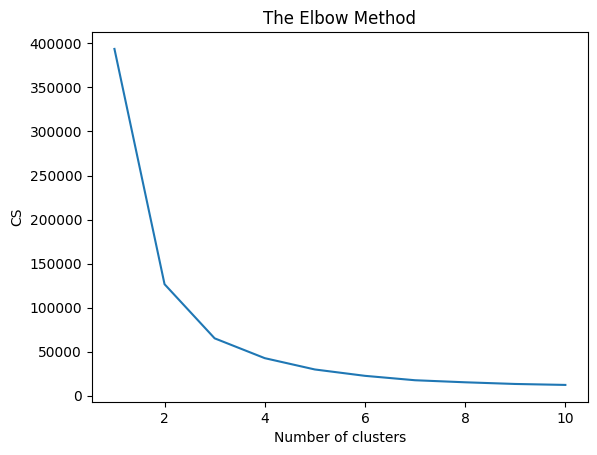

In [12]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data2[["rataan", "s.baku"]])
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(data2[["rataan", "s.baku"]])

data2["label"] = kmeans.labels_
data2

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ptn                      prodi  rataan  s.baku  \
0    INSTITUT PERTANIAN BOGOR                 AGRIBISNIS  630.64   20.82   
1    INSTITUT PERTANIAN BOGOR  AGRONOMI DAN HORTIKULTURA  621.06   18.85   
2    INSTITUT PERTANIAN BOGOR                   AKTUARIA  667.16   18.33   
3    INSTITUT PERTANIAN BOGOR        ARSITEKTUR LANSEKAP  642.13   14.54   
4    INSTITUT PERTANIAN BOGOR                   BIOKIMIA  649.44   18.41   
..                        ...                        ...     ...     ...   
493  UPN "VETERAN" YOGYAKARTA         TEKNIK INFORMATIKA  629.08   15.04   
494  UPN "VETERAN" YOGYAKARTA               TEKNIK KIMIA  622.96   13.20   
495  UPN "VETERAN" YOGYAKARTA          TEKNIK LINGKUNGAN  616.40   10.18   
496  UPN "VETERAN" YOGYAKARTA         TEKNIK PERMINYAKAN  621.13   17.25   
497  UPN "VETERAN" YOGYAKARTA        TEKNIK PERTAMBANGAN  636.41   19.42   

     kapasitas  label  
0         55.0      0  
1         78.0      1  
2         27.0      2  
3         35.0      0  
4         40.0      0  
..         ...    ...  
493      100.0      1  
494       80.0      1  
495       63.0      1  
496       90.0      1  
497       90.0      0  

[498 rows x 6 columns]

In [14]:
kmeans.cluster_centers_
data3 = data2.copy()
data3['label'] = data3['label'].replace({1: 0, 0: 1})
data3[["label", "rataan", "s.baku"]].groupby("label").mean()

rataan     s.baku
label                       
0      613.112727  14.878058
1      644.982102  16.723864
2      684.265625  19.567250

In [15]:
data3.to_excel("data_klaster.xlsx", index=False)

In [16]:
# rataan is ALL nilai GOT U IN
# nilai is ID's total score

data.columns

Index(['id', 'kode_ptn', 'ptn', 'kode_prodi', 'prodi', 'rank', 'rataan',
       's.baku', 'min', 'max', 'kapasitas', 'bio', 'fis', 'kim', 'kmb', 'kpu',
       'kua', 'mat', 'ppu', 'nilai', 'lolos'],
      dtype='object')

In [17]:
# okey, kinda good, only  10%
# classify --> really focus on minimizing P(False|Pred True) --> False Positive 
# really care only in precision +
var1 = ['rataan','s.baku', 'min', 'max', 'kapasitas', 'bio', 'fis', 'kim', 'kmb', 'kpu',
       'kua', 'mat', 'ppu', 'nilai']
data.lolos.value_counts()/data.shape[0]*100

lolos
False    87.04978
True     12.95022
Name: count, dtype: float64

### Viz.
- All viz will be using 10k samples
- Well, kinda representative.

In [18]:
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
data.shape

(62053, 21)

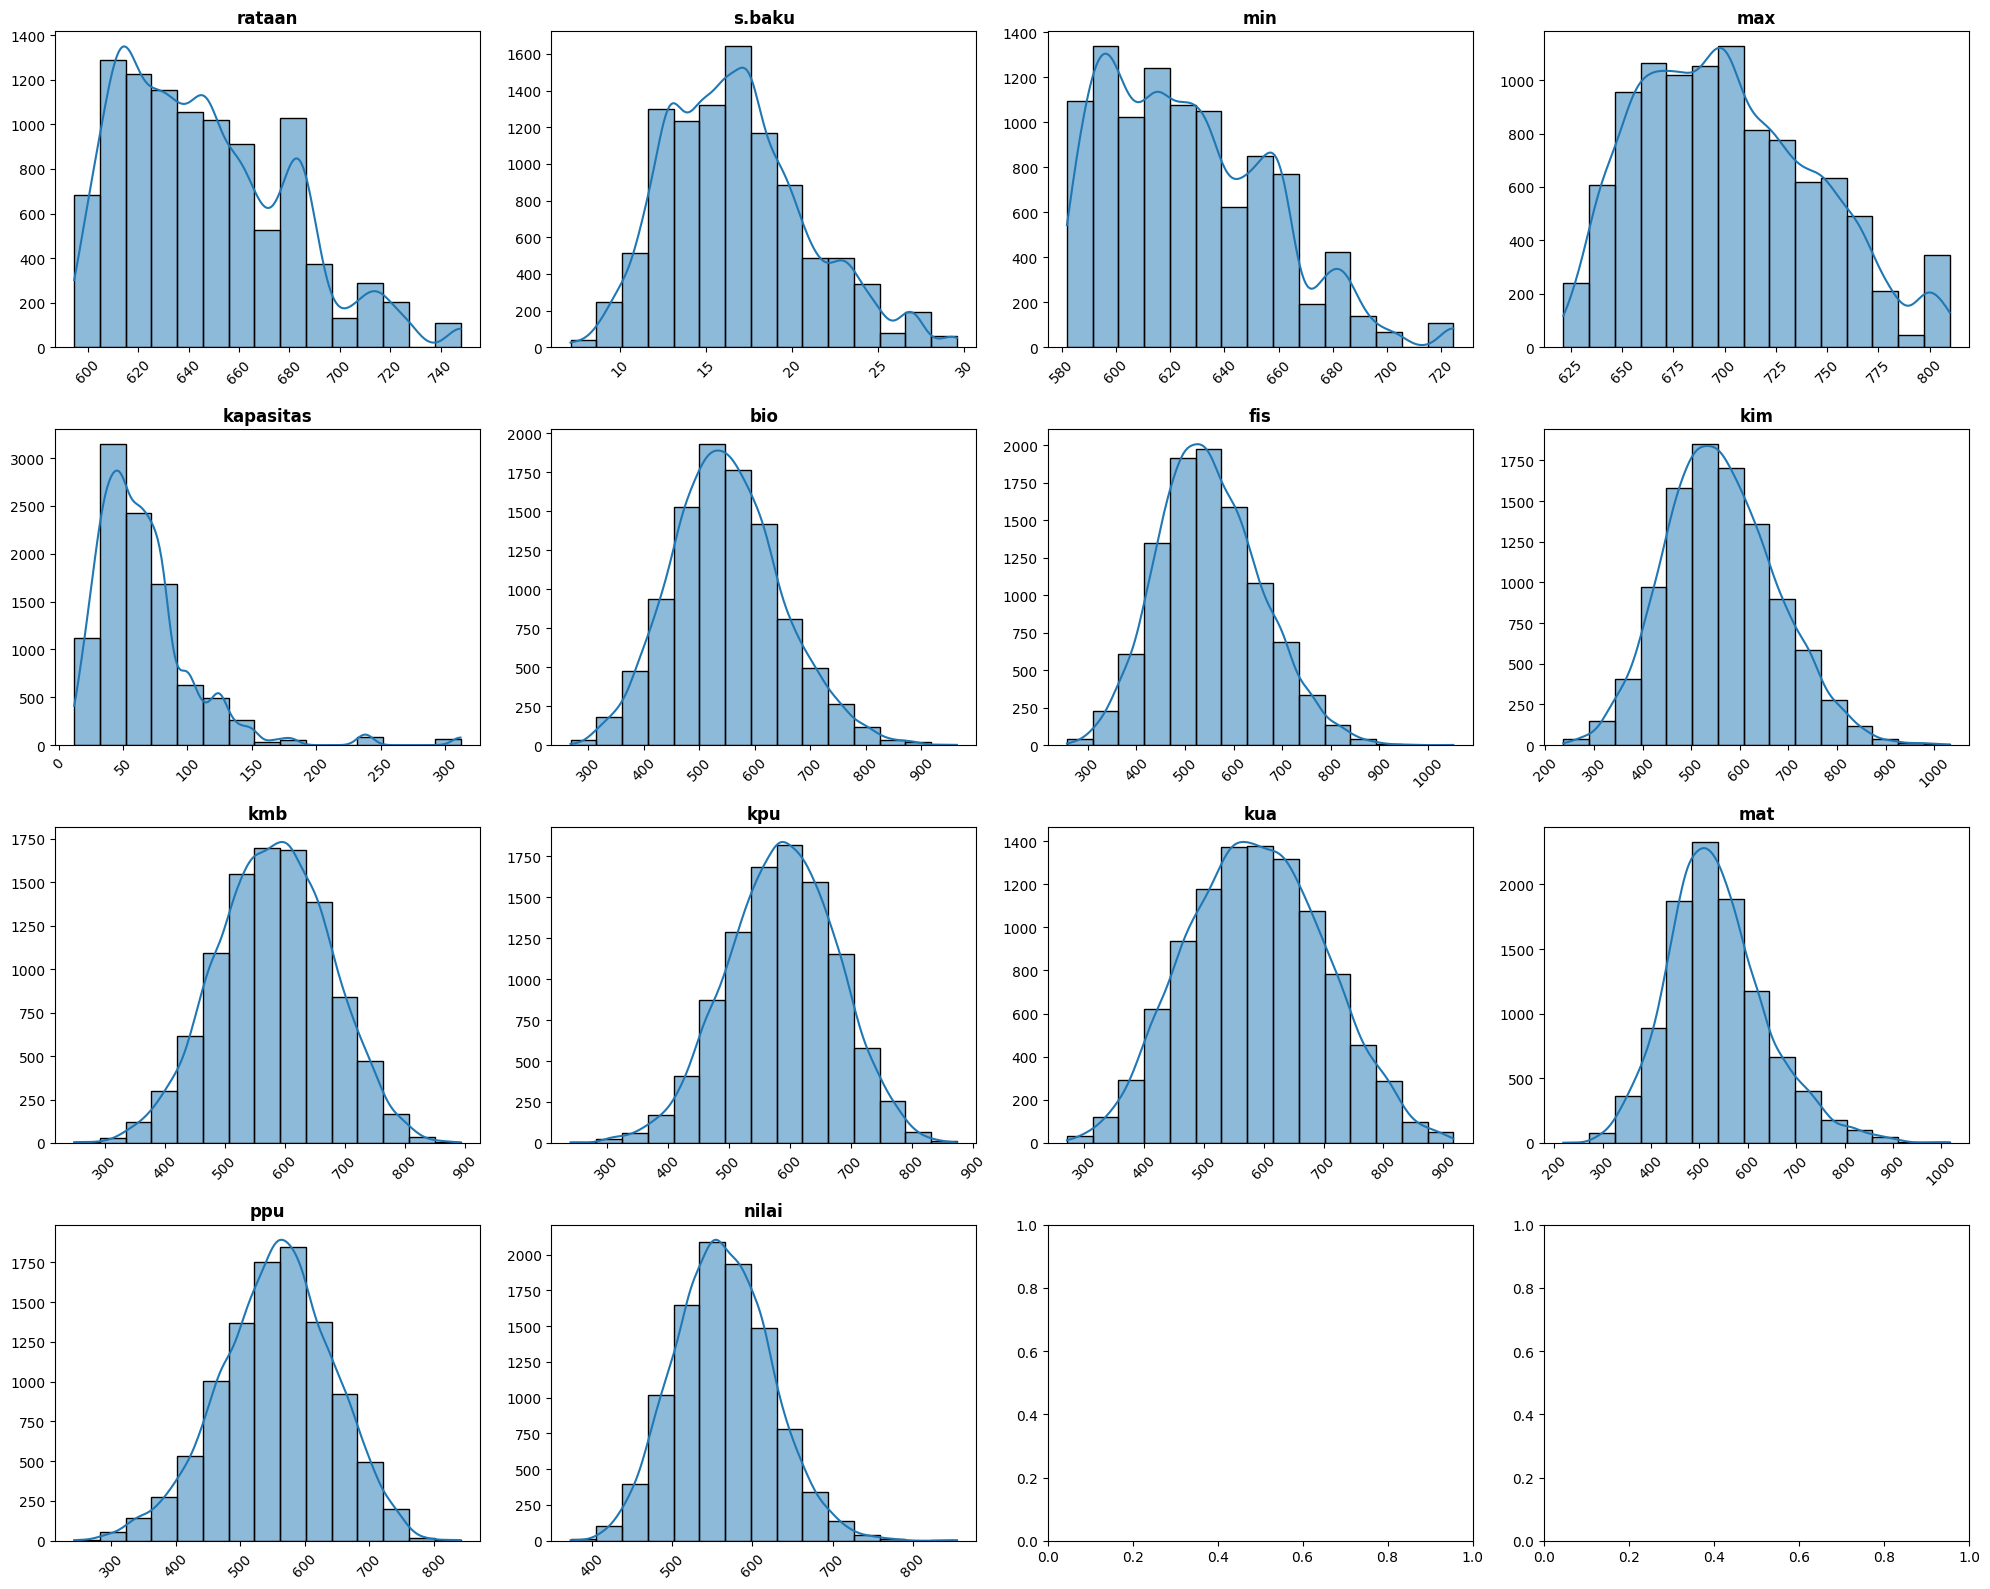

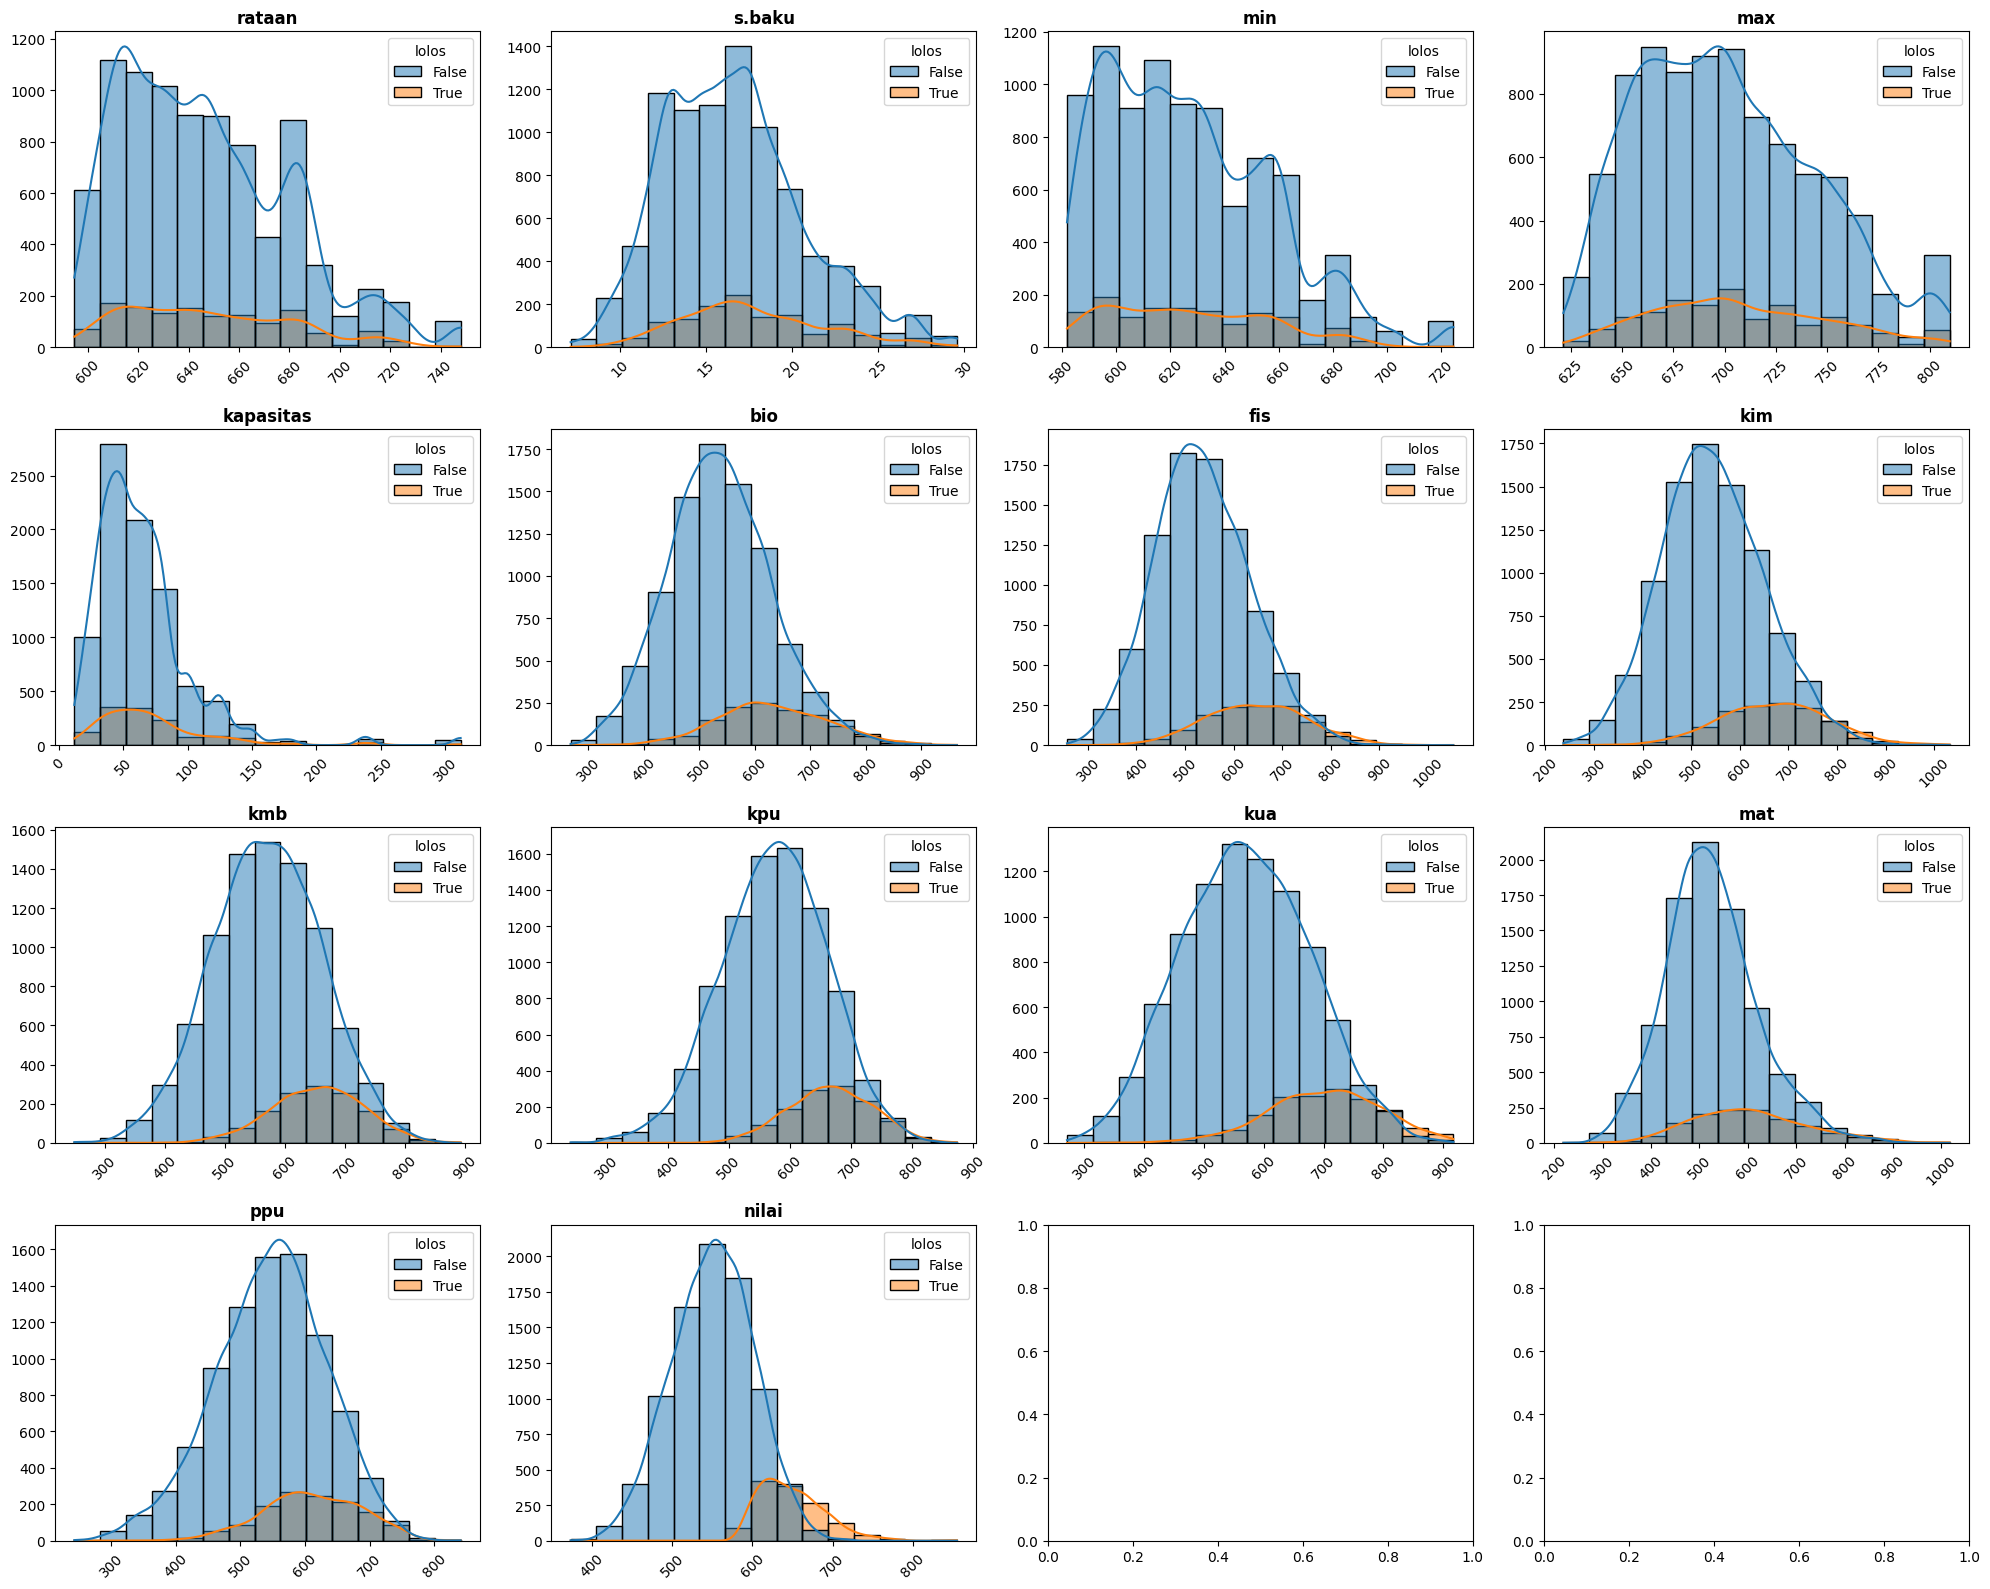

In [19]:
# using sample to viz, 20%
random.seed(123)
rdsam = random.sample(sorted(data.index), 10000)
sampel = data.loc[rdsam,:] 

fig, axes = plt.subplots(4, 4, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var1):
    sns.histplot(data=sampel, x=var, ax=axes[i], kde=True, bins=15)
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

plt.tight_layout()


fig, axes = plt.subplots(4, 4, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var1):
    sns.histplot(data=sampel, x=var, ax=axes[i], kde=True, bins=15, hue="lolos")
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

plt.tight_layout()

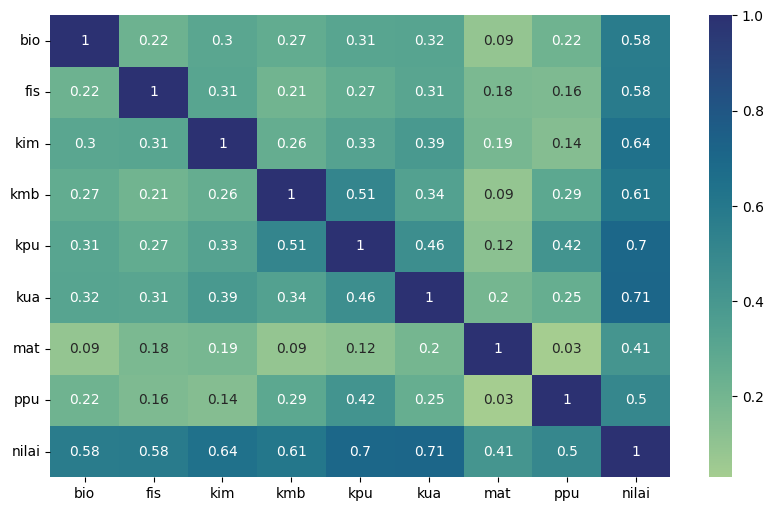

In [20]:
dfk1 = data.copy()

dfk1["tot_daftar"] = dfk1.groupby("rank")["id"].transform("count")
dfk1["tot_lolos"] = dfk1.groupby("rank")["lolos"].transform("sum")
dfk1["persentase"] = dfk1.tot_lolos/dfk1.tot_daftar*100

dfk1.head()

var2 = ['bio', 'fis', 'kim', 'kmb', 'kpu','kua', 'mat', 'ppu', 'nilai']

sampel[var2]

corsam = sampel[var2].corr()
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(ax = ax, data = corsam, annot = True, cmap="crest")
ax.set_yticklabels(corsam,rotation = 0)
plt.show()

### 2ND K-Means Method

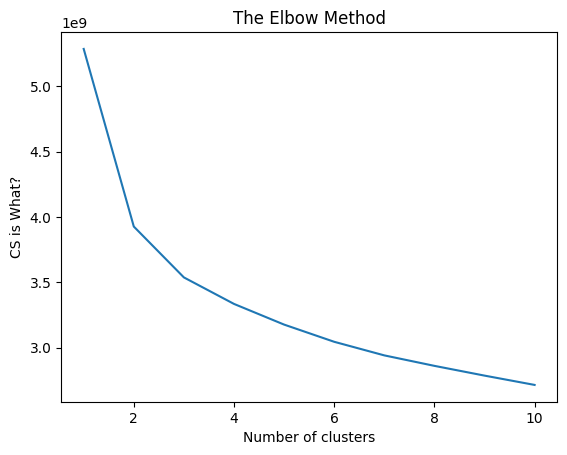

In [21]:
csk1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfk1[var2])
    csk1.append(kmeans.inertia_)
plt.plot(range(1, 11), csk1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS is What?')
plt.show()

In [22]:
random.seed(123)
var3 = var2.copy()
var3.remove("nilai")

dfk1b = dfk1.copy()
km1 = KMeans(n_clusters=3,random_state=0)
SS1 = StandardScaler()
scaled1 = SS1.fit_transform(dfk1b[var3])

km1.fit(scaled1)

dfk1b["label"] = km1.labels_
dfk1b.head()

display(dfk1b.groupby("label")[var2].mean().transpose(),
        dfk1b.groupby("label")[var2].median().transpose())

dfk1b.label.value_counts()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


label           0           1           2
bio    495.889928  625.080063  542.081068
fis    504.835344  633.389293  534.578436
kim    495.178177  672.781553  541.832053
kmb    502.668627  638.185199  604.801560
kpu    501.381685  652.714874  609.181205
kua    505.982308  693.434654  583.980971
mat    516.816496  596.195979  513.300643
ppu    489.651538  585.175085  584.497134
nilai  501.550513  637.119587  564.281634

label      0       1        2
bio    494.0  620.00  540.000
fis    499.5  630.00  532.000
kim    493.0  673.00  542.000
kmb    502.0  640.00  603.000
kpu    506.0  652.00  607.000
kua    504.0  696.00  586.000
mat    509.0  586.00  508.000
ppu    492.0  586.00  584.000
nilai  504.0  630.25  564.875

label
2    25645
0    19896
1    16512
Name: count, dtype: int64

In [23]:
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

<Axes: xlabel='PC1', ylabel='PC2'>

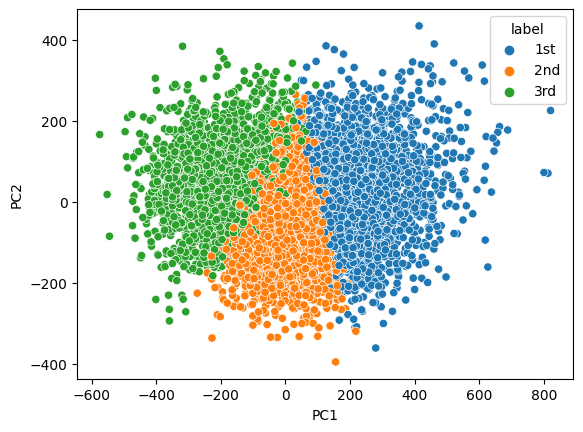

In [24]:
random.seed(123)
# using sample data
pca = PCA(2)
 
#Transform the data
pc_sam = pd.DataFrame(pca.fit_transform(dfk1b[var2]), columns=["PC1", "PC2"])
pc_sam = pc_sam.loc[rdsam,:]

pc_sam["label"] = dfk1b.loc[rdsam,"label"]
pc_sam["nilai"] = dfk1b.loc[rdsam,"nilai"]
pc_sam["label"] = pc_sam["label"].replace([0,1,2], "3rd 1st 2nd".split(" "))

# low, high, med
sns.scatterplot(pc_sam, x="PC1", y="PC2", hue="label",)

In [25]:
dfk2 = dfk1.select_dtypes(exclude="object").groupby("rank").mean()

kolk1 = ['bio', 'fis', 'kim', 'kmb', 'kpu', 'kua', 'mat', 'ppu']
# csk2 = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(dfk1[kolk1])
#     csk2.append(kmeans.inertia_)
# plt.plot(range(1, 11), csk2)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS is What?')
# plt.show()

In [26]:


# dfk2b = dfk2.copy()
# km2 = KMeans(n_clusters=3,random_state=0)
# km2.fit(dfk2[kolk1])
# dfk2b["label"] = km2.labels_
# dfk1b

In [27]:
# dfk2b.sort_values(["rank", "nilai"]).groupby("label")["nilai"].plot()

# # dfk2b.sort_values(["rank", "nilai"]).groupby("kode_prodi")["nilai"].plot()


# dfk2b
# dfk2b.sort_values(["rank", "nilai"]).groupby("kode_prodi")["nilai"]

In [28]:
# dfk2b.label.plot()
# dfk2b.persentase.plot()
# dfk2b.mat.plot()
# dfk2b.bio.plot()
# dfk2b.fis.plot()
# dfk2b.kim.plot()
# dfk2b.ppu.plot()

### AGAIN
- Univ Prestisitas/Rank
- Based on: rataan peminat by 8, min masuk, n peminat, n masuk, s.baku

In [29]:
dfk3 = dfk2.copy()
dfk3["std"] = dfk1[["rank", "nilai"]].groupby("rank").std()
kolk3 = ["min", "tot_daftar", "tot_lolos", 'bio', 'fis', 'kim', 'kmb', 'kpu', 'kua', 'mat', 'ppu', "std"]

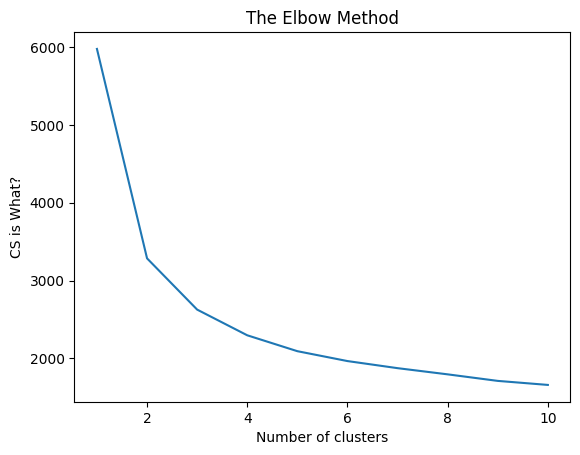

In [30]:
skala2 = StandardScaler()

dfk4 = pd.DataFrame(skala2.fit_transform(dfk3[kolk3]), columns=kolk3)

# dfk4.head(), dfk3[kolk3].head()

csk4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfk4[kolk3])
    csk4.append(kmeans.inertia_)
plt.plot(range(1, 11), csk4)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS is What?')
plt.show()

### Viznya masih jelek, tapi kurang lebih gini ygy.

In [31]:
dfk4b = dfk1[["ptn", "prodi", "rank"]].drop_duplicates().set_index("rank").join(dfk3)
km4 = KMeans(n_clusters=3,random_state=0)
km4.fit(dfk4[kolk3])
dfk4b["label"] = km4.labels_
dfk4b.reset_index(inplace=True)
display(dfk4b.columns)

desk = ["tot_lolos", "rank", "tot_daftar", "s.baku", "std", "rataan", "nilai", "persentase"]

display(dfk4b.groupby("label")[desk].mean().transpose())
display(dfk4b.groupby("label")[desk].median().transpose())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['rank', 'ptn', 'prodi', 'id', 'kode_ptn', 'kode_prodi', 'rataan',
       's.baku', 'min', 'max', 'kapasitas', 'bio', 'fis', 'kim', 'kmb', 'kpu',
       'kua', 'mat', 'ppu', 'nilai', 'lolos', 'tot_daftar', 'tot_lolos',
       'persentase', 'std', 'label'],
      dtype='object')

label                0           1           2
tot_lolos     9.494118   17.286517   39.046154
rank        358.984314  168.505618   47.369231
tot_daftar   93.866667  135.589888  215.107692
s.baku       15.039255   16.715449   19.983231
std          46.066395   52.975655   63.896029
rataan      615.870941  646.784551  683.948308
nilai       539.810109  567.206992  597.728786
persentase   10.193653   13.819893   19.512009

label                0           1           2
tot_lolos     8.000000   15.000000   32.000000
rank        370.000000  163.500000   39.000000
tot_daftar   86.000000  115.500000  179.000000
s.baku       14.330000   16.240000   19.630000
std          45.752831   52.447536   64.475475
rataan      613.560000  645.630000  682.640000
nilai       540.336957  566.257188  595.888720
persentase    9.655172   12.810256   18.750000

#### Insight 012 based on Nilai and Rataan 
- anggota: 255. 	178. 	65.
- rataan: 615.870941 	646.784551 	683.948308
- nilai: 539.810109 	567.206992 	597.728786
- persentase: 10.193653 	13.819893 	19.512009
- std: 46.066395 	52.975655 	63.896029
- tot daftar: 93.866667 	135.589888 	215.107692
- tot lolos: 9.494118 	17.286517 	39.046154

1. Cluster 2
1. Viz Cluster 2 --> label 1 x label 2 x lolos tidak 18? daym.
1. Sistem Rekomendasi UTBK (menggunakan proxy berupa TO)
    1. Eak
    1. YG
    1. Klasifikasi
    1. HOHOHO.
1. And How? we can standardize the TO, so it has the same distribution as this UTBK scores
1. So, we can compare them like apple to apple, about one's position in the real UTBK scenario.
1. Nah, in those case, after standardization we have another scenario
    1. first, if the TO is being held for many siswa, then they can approximately menggambarkan real UTBK scenarion
    1. meanwhile, if they only consist of some siswa, then they can use standardized value, and using OUR model, to decide its place, ofc in this scenario, it wont be that good approximation
1. Nah, if one's clustered into the lowest level, plz, u shall study harder or else, GWS bang.
1. Otherwise, we can predict for the rest of the class

PC1       PC2 label
0    9.006915  4.370670    G1
1    7.416395  1.477280    G1
2    6.887405  3.501526    G1
3    8.275566  3.058468    G1
4    5.913634 -0.572374    G1
..        ...       ...   ...
493 -5.224848  0.522785    G3
494 -3.034488 -0.162157    G3
495 -2.927334  0.738304    G3
496 -4.260035  0.960387    G3
497 -0.946558  3.334253    G3

[498 rows x 3 columns]

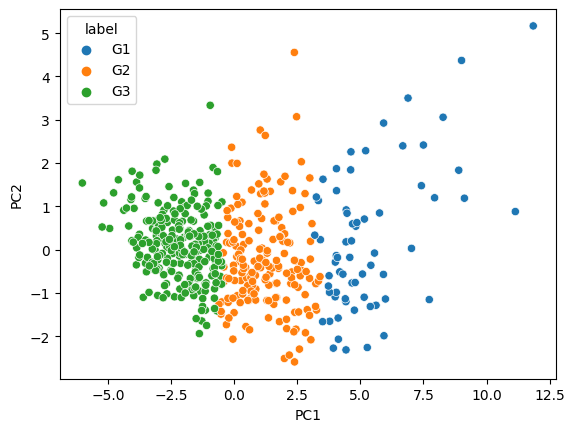

In [32]:
random.seed(123)
pca2 = PCA(2)
 
#Transform the data
pc_sam2 = pd.DataFrame(pca2.fit_transform(dfk4[kolk3]), columns=["PC1", "PC2"])

pc_sam2["label"] = dfk4b["label"]
pc_sam2["label"] = pc_sam2["label"].replace([0,1,2], "G3 G2 G1".split(" "))
sns.scatterplot(pc_sam2, x="PC1", y="PC2", hue="label",)

pc_sam2

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

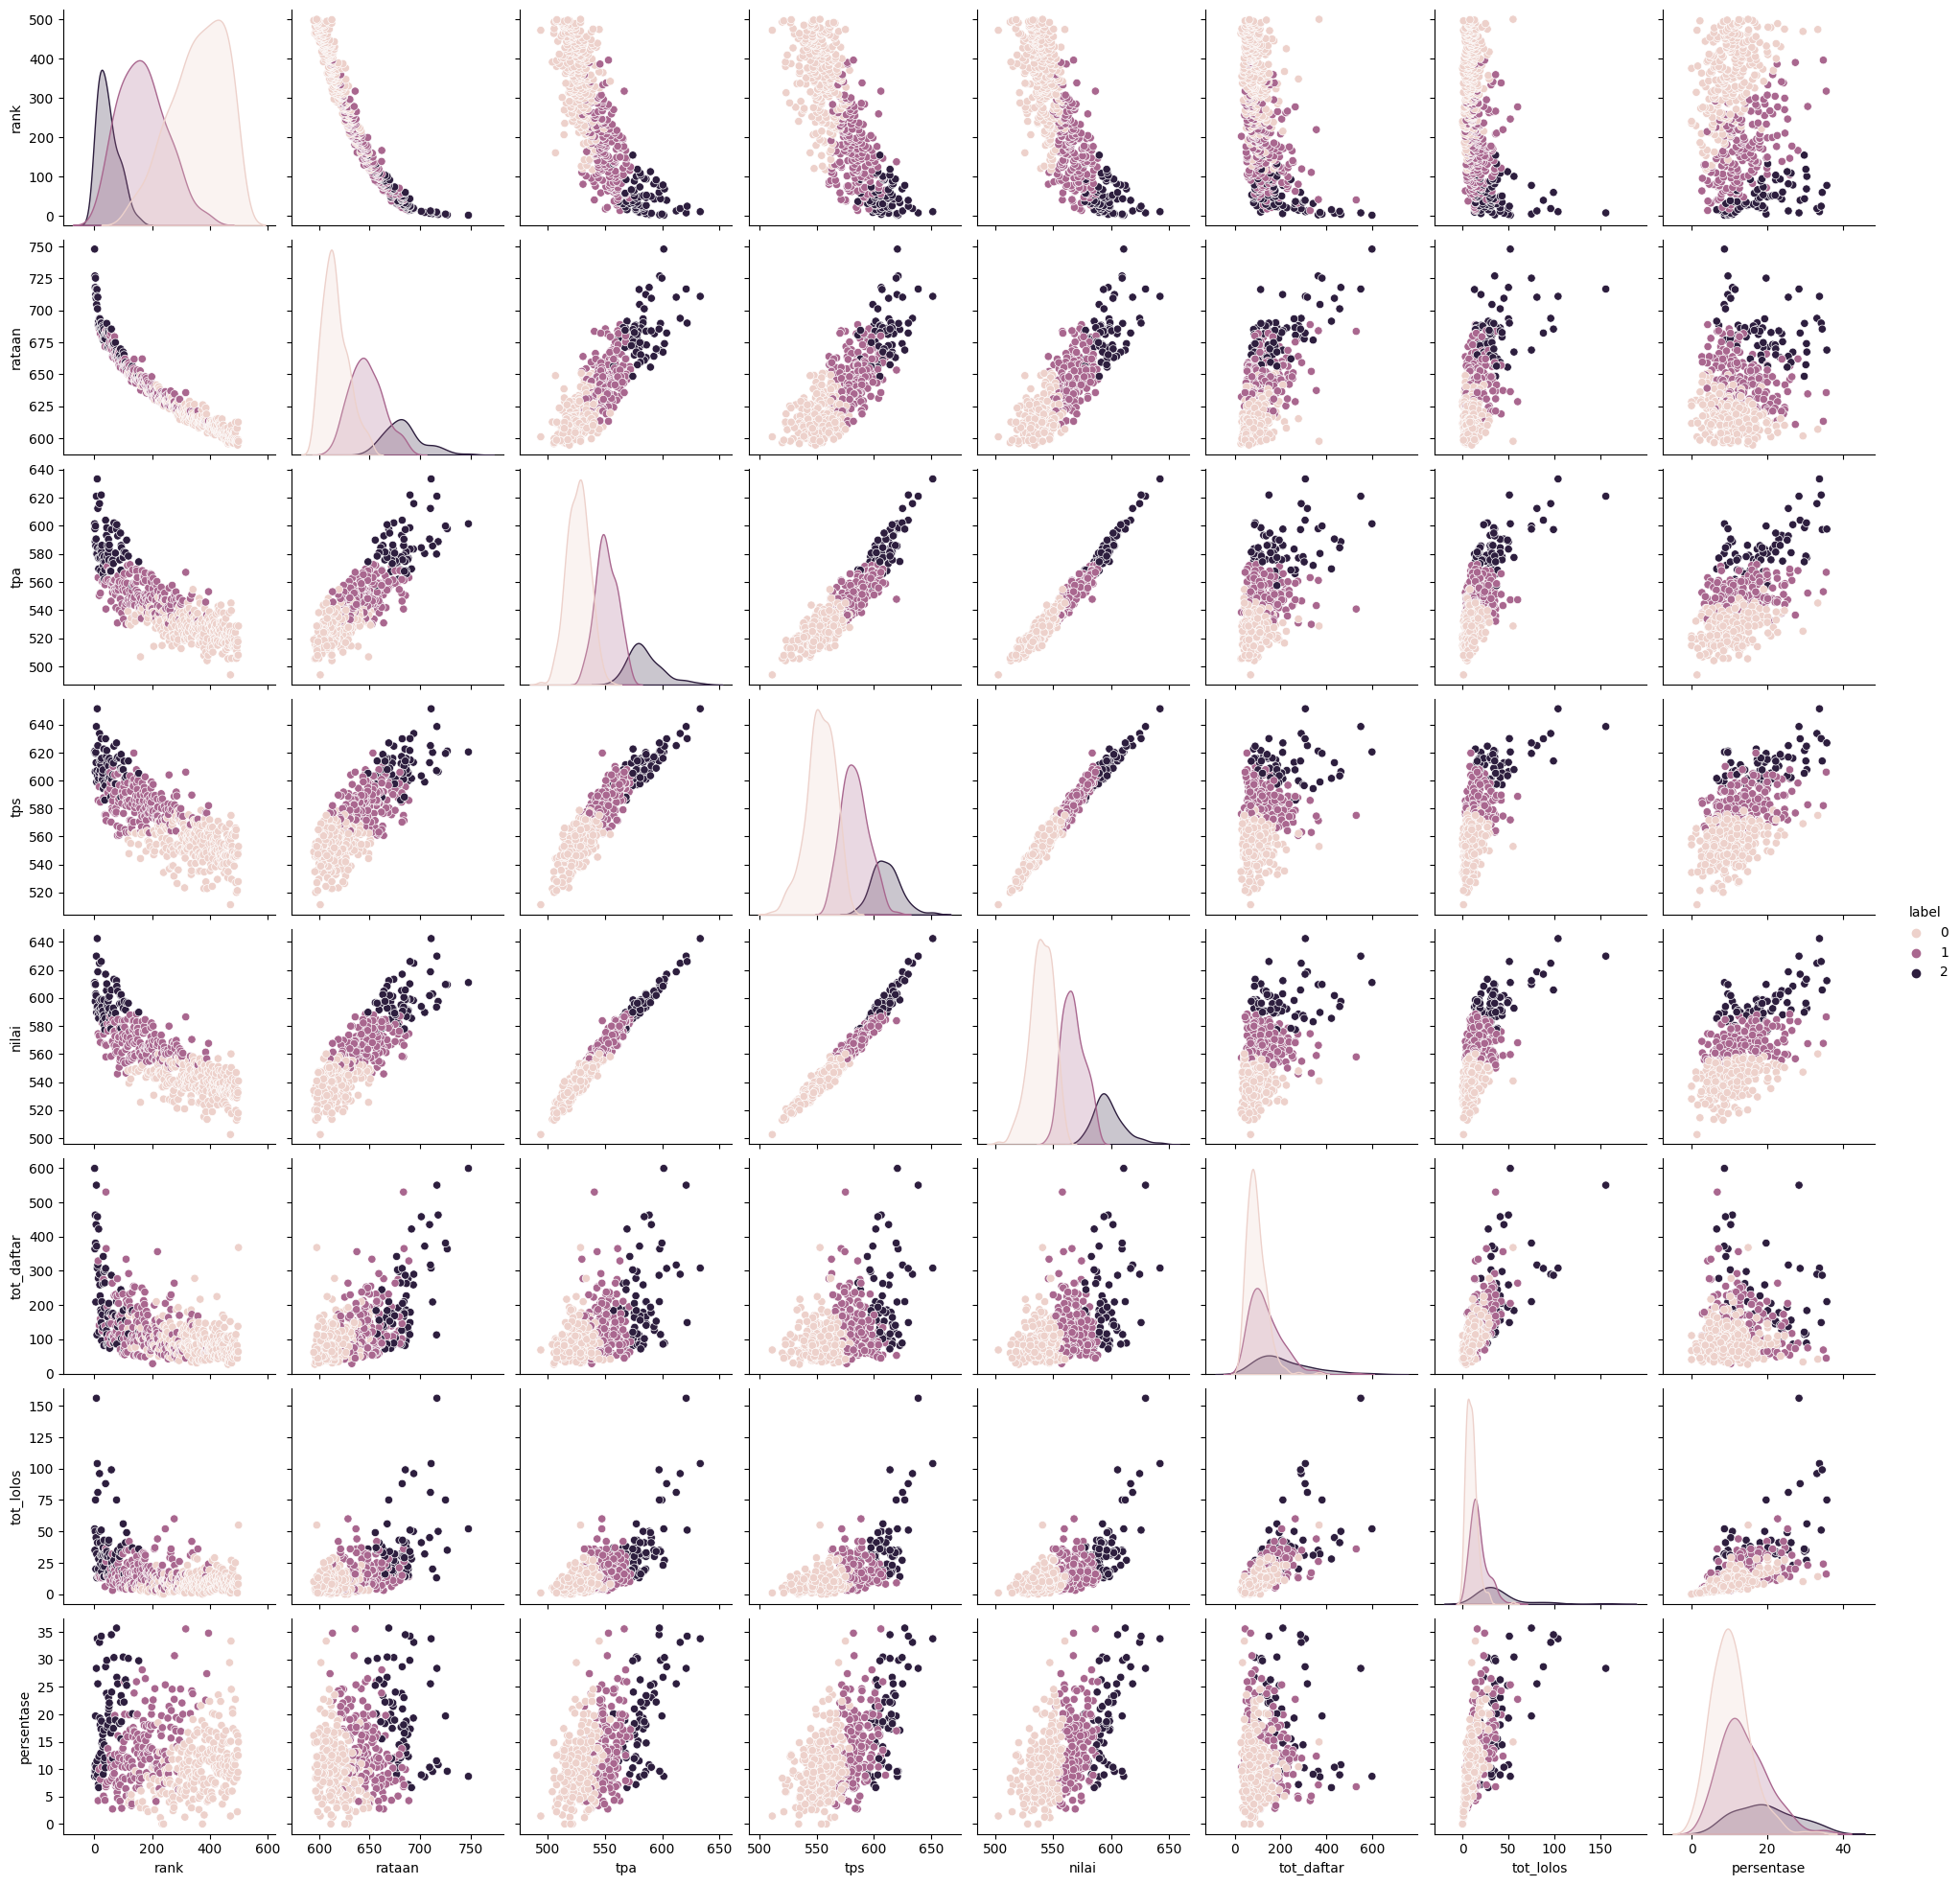

<Figure size 640x480 with 0 Axes>

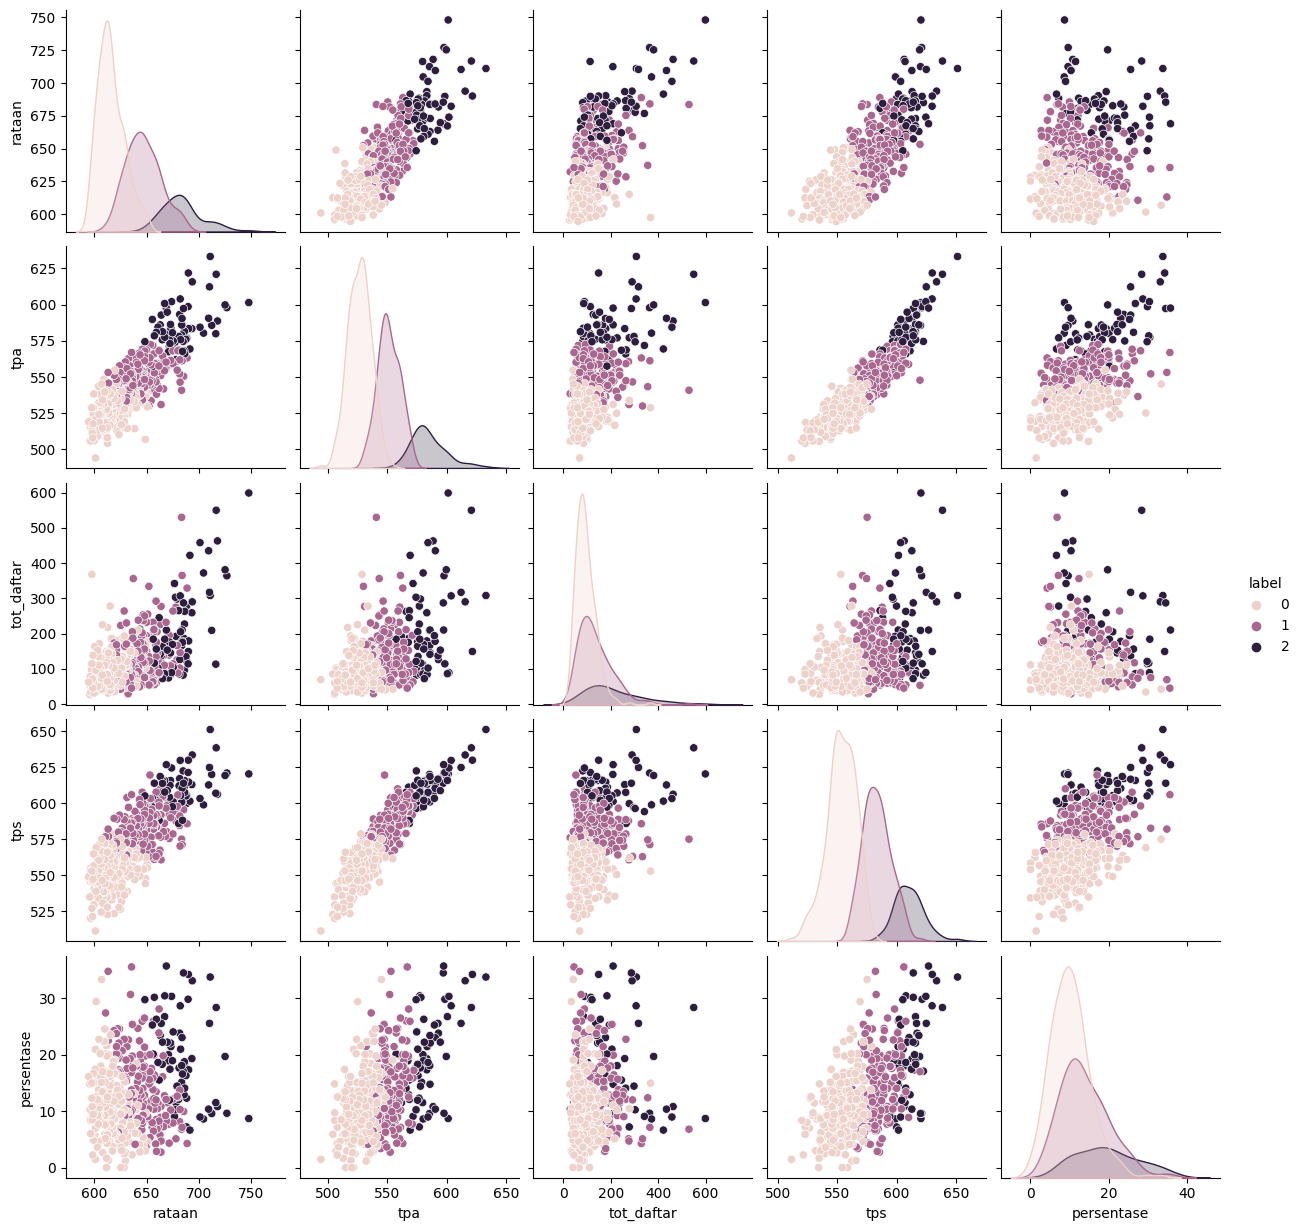

In [33]:
dfk4c = dfk4b.copy()
tpa = ['bio', 'fis', 'kim', 'mat']
tps = ['kmb', 'kpu','kua', 'ppu']
dfk4c["tpa"] = dfk4c[tpa].mean(1)
dfk4c["tps"] = dfk4c[tps].mean(1)

var4 = ['rank','rataan', 'tpa', 'tps', 'nilai', 'tot_daftar', 'tot_lolos','persentase','label']
plt.figure()
sns.pairplot(dfk4c[var4], hue="label")

var4 = ['rataan', 'tpa', 'tot_daftar' , 'tps','persentase','label']
plt.figure()
sns.pairplot(dfk4c[var4], hue="label")

In [34]:
# pendidikan dokter, kedokteran, ilmu aktuaria, aktuaria, sek arsitektir,

## Klasifikasi?

In [35]:
df5 = dfk1b.copy()
df5["label"] = df5["label"].replace([0,1,2], "3rd 1st 2nd".split(" "))
df5 = df5.set_index("rank").join(dfk4b.set_index("rank")["label"], lsuffix="_sis", rsuffix="_ptn")
df5["label_ptn"].replace([0,1,2], "G3 G2 G1".split(" "), inplace=True)
# eak

In [36]:
df5.groupby("label_sis")["lolos"].value_counts()

label_sis  lolos
1st        False     9377
           True      7135
2nd        False    24744
           True       901
3rd        False    19896
Name: count, dtype: int64

In [37]:
df5.head().transpose()

rank                            1                      1  \
id                           14.0                   43.0   
kode_ptn                    321.0                  321.0   
ptn         UNIVERSITAS INDONESIA  UNIVERSITAS INDONESIA   
kode_prodi                3211015                3211015   
prodi           PENDIDIKAN DOKTER      PENDIDIKAN DOKTER   
rataan                     747.93                 747.93   
s.baku                      19.63                  19.63   
min                        724.38                 724.38   
max                        798.55                 798.55   
kapasitas                    72.0                   72.0   
bio                         816.0                  438.0   
fis                         666.0                  459.0   
kim                         651.0                  532.0   
kmb                         678.0                  524.0   
kpu                         685.0                  442.0   
kua                         706.0                  654.0   
mat                         695.0                  535.0   
ppu                         562.0                  537.0   
nilai                     682.375                515.125   
lolos                       False                  False   
tot_daftar                    599                    599   
tot_lolos                      52                     52   
persentase               8.681135               8.681135   
label_sis                     1st                    3rd   
label_ptn                      G1                     G1   

rank                            1                      1  \
id                          192.0                 1949.0   
kode_ptn                    321.0                  333.0   
ptn         UNIVERSITAS INDONESIA  UNIVERSITAS INDONESIA   
kode_prodi                3211015                3211015   
prodi           PENDIDIKAN DOKTER      PENDIDIKAN DOKTER   
rataan                     747.93                 747.93   
s.baku                      19.63                  19.63   
min                        724.38                 724.38   
max                        798.55                 798.55   
kapasitas                    72.0                   72.0   
bio                         766.0                  738.0   
fis                         676.0                  562.0   
kim                         751.0                  716.0   
kmb                         632.0                  711.0   
kpu                         568.0                  676.0   
kua                         834.0                  772.0   
mat                         444.0                  906.0   
ppu                         703.0                  573.0   
nilai                      671.75                 706.75   
lolos                       False                  False   
tot_daftar                    599                    599   
tot_lolos                      52                     52   
persentase               8.681135               8.681135   
label_sis                     1st                    1st   
label_ptn                      G1                     G1   

rank                            1  
id                         2529.0  
kode_ptn                    321.0  
ptn         UNIVERSITAS INDONESIA  
kode_prodi                3211015  
prodi           PENDIDIKAN DOKTER  
rataan                     747.93  
s.baku                      19.63  
min                        724.38  
max                        798.55  
kapasitas                    72.0  
bio                         728.0  
fis                         790.0  
kim                         656.0  
kmb                         593.0  
kpu                         739.0  
kua                         503.0  
mat                         454.0  
ppu                         664.0  
nilai                     640.875  
lolos                       False  
tot_daftar                    599  
tot_lolos                      52  
persentase               8.681135  
label_sis     

### Viz Gabungan
- Ini pake sampel sih, biar gk meledaq
- Based on label_sis? and what? using graded PTN?
-

In [38]:
# mosaic plot
display(pd.crosstab(df5.label_sis, df5.label_ptn),
        df5.groupby("label_sis")["lolos"].value_counts(),
        df5.groupby("label_ptn")["lolos"].value_counts())

label_ptn    G1     G2     G3
label_sis                    
1st        7037   7011   2464
2nd        4412  10245  10988
3rd        2533   6879  10484

label_sis  lolos
1st        False     9377
           True      7135
2nd        False    24744
           True       901
3rd        False    19896
Name: count, dtype: int64

label_ptn  lolos
G1         False    11444
           True      2538
G2         False    21058
           True      3077
G3         False    21515
           True      2421
Name: count, dtype: int64

### Insight
- GWS buat kluster 3
- kluster 2 hati2 aja deh ya
- kluster 1 ahahah yakali berani ambil klaster 1 ptn

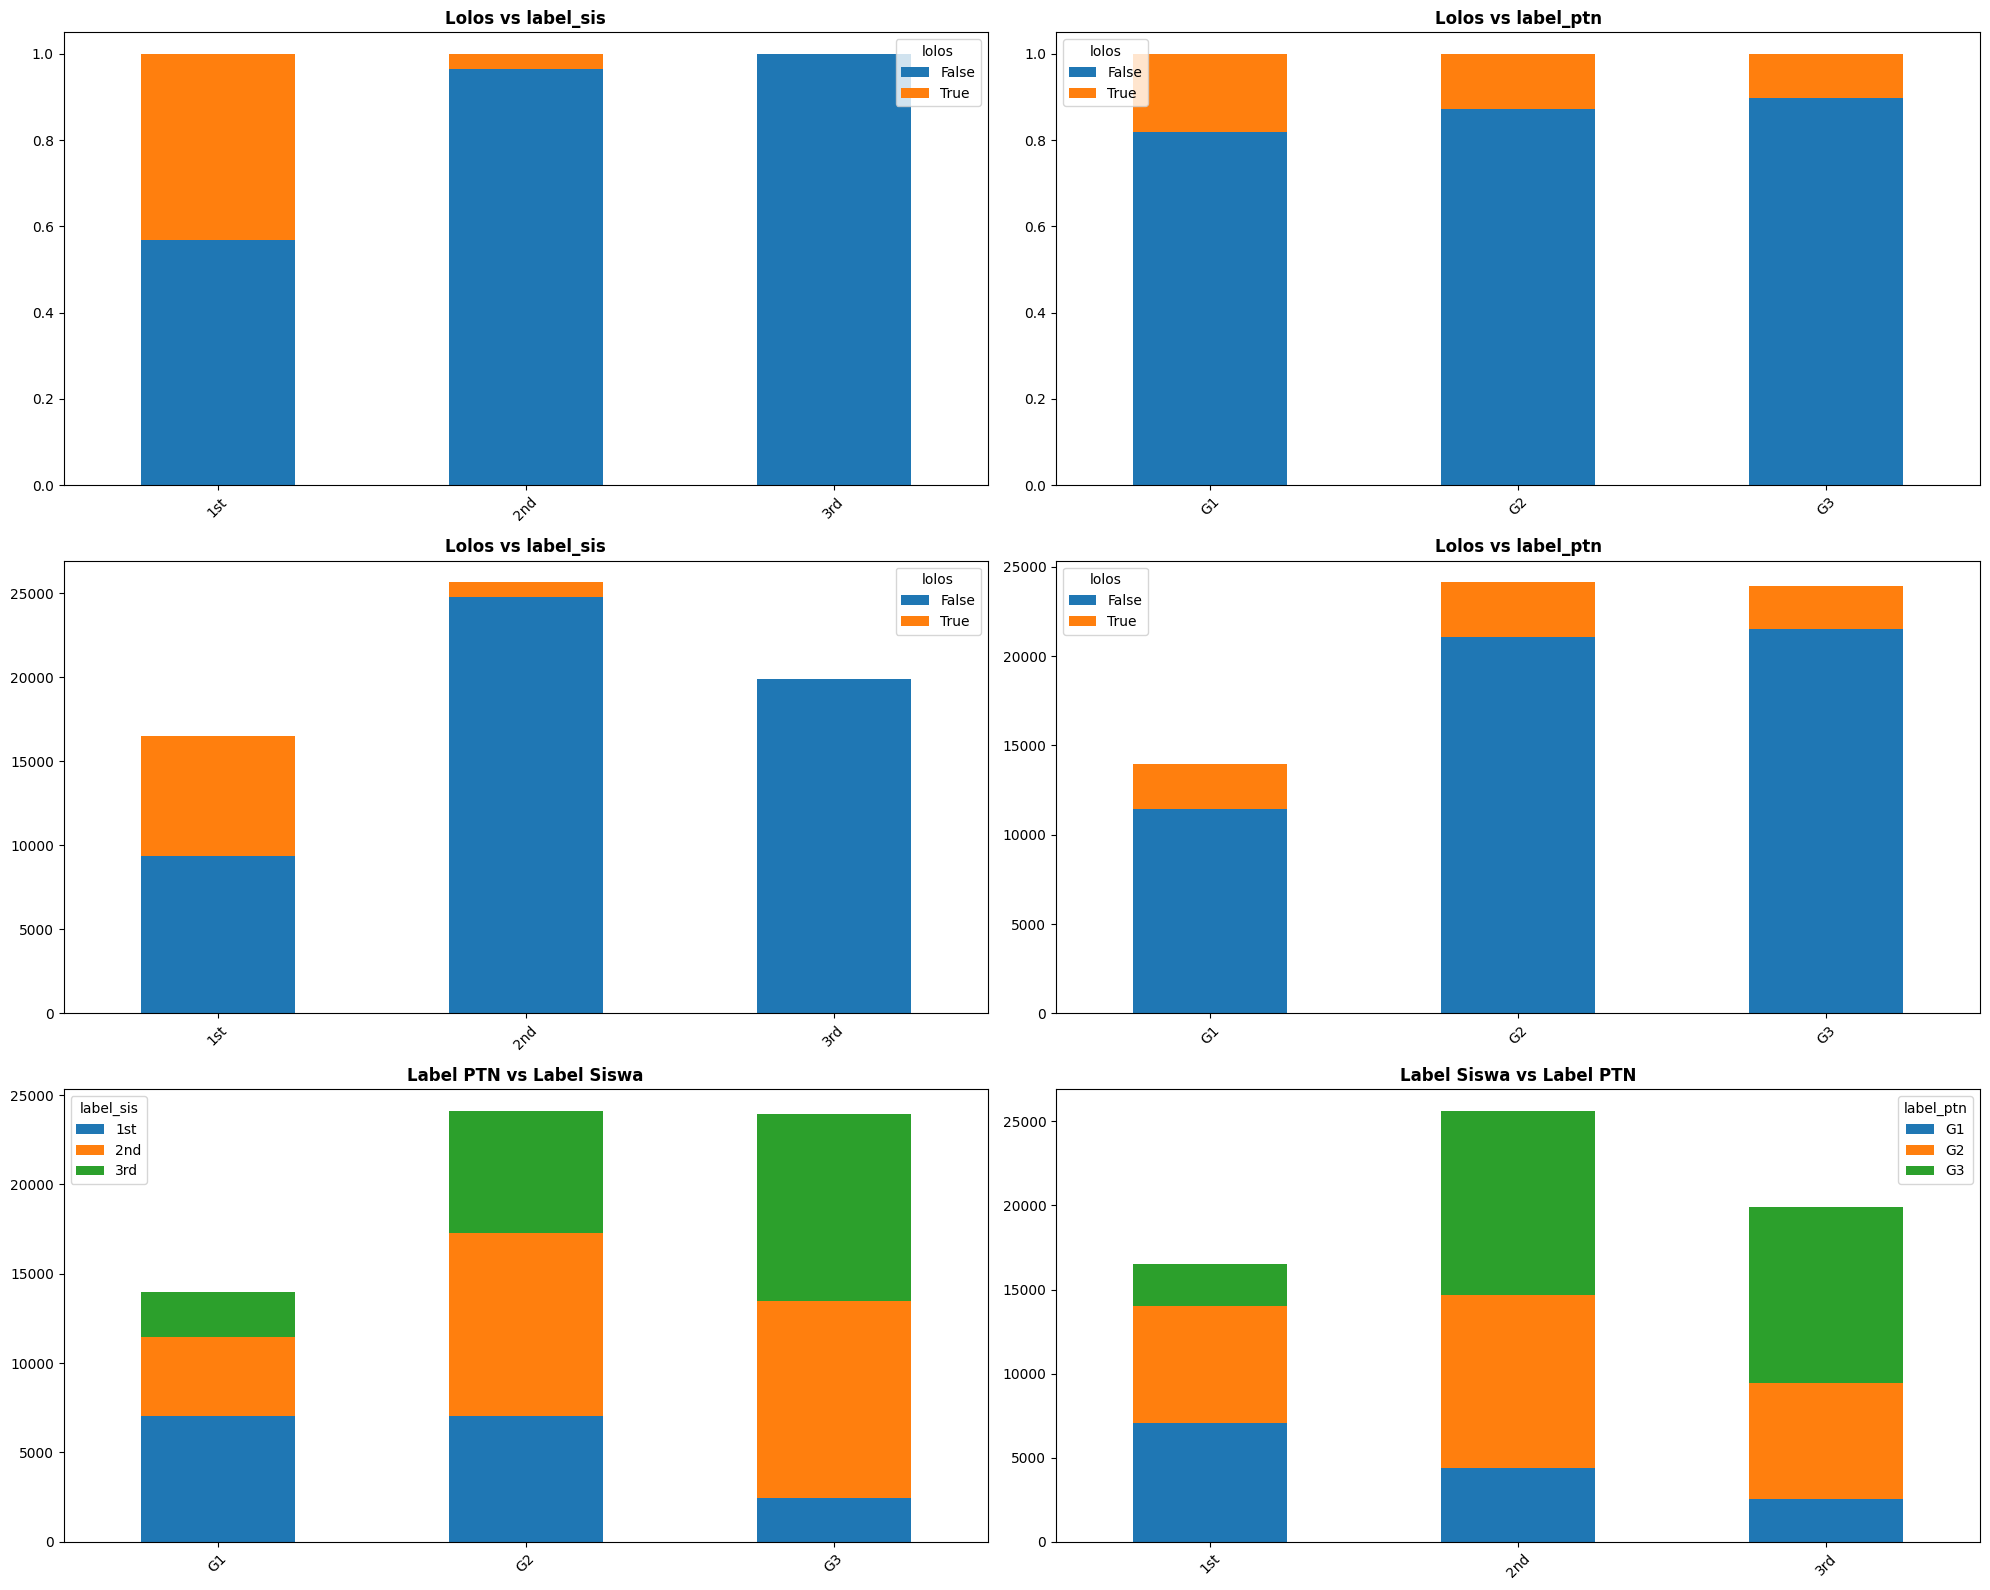

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(["label_sis", "label_ptn"]):
    
    tbl = pd.crosstab(df5[var], df5["lolos"], normalize="index")
    tbl.plot(kind="bar", stacked=True, ax=axes[i], legend=True)
    axes[i].set_title(f'Lolos vs {var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

for i, var in enumerate(["label_sis", "label_ptn"]):
    i = i+2
    tbl = pd.crosstab(df5[var], df5["lolos"], normalize=False)
    tbl.plot(kind="bar", stacked=True, ax=axes[i], legend=True)
    axes[i].set_title(f'Lolos vs {var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

i = 4
tbl = pd.crosstab(df5["label_ptn"], df5["label_sis"], normalize=False)
tbl.plot(kind="bar", stacked=True, ax=axes[i], legend=True)
axes[i].set_title(f'Label PTN vs Label Siswa', fontsize=12, fontweight='bold')
axes[i].set_ylabel(None)
axes[i].set_xlabel(None)
axes[i].tick_params(axis='x', rotation=45)

i = 5
tbl = pd.crosstab(df5["label_sis"], df5["label_ptn"], normalize=False)
tbl.plot(kind="bar", stacked=True, ax=axes[i], legend=True)
axes[i].set_title(f'Label Siswa vs Label PTN', fontsize=12, fontweight='bold')
axes[i].set_ylabel(None)
axes[i].set_xlabel(None)
axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()

- prob(lolos) ~ nilai8 + persentase + label_ptn | label_sis
- G1 > G2 > G3 or 2 > 1 > 0
- 1st > 2nd > 3rd or satunya ngarang

In [40]:
from pandas import CategoricalDtype
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

# HEHE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, RobustScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, auc, roc_auc_score
from sklearn.metrics import f1_score, balanced_accuracy_score, fbeta_score, precision_recall_curve, roc_curve

In [41]:
var5 = var3+["persentase", "label_ptn", "label_sis", "lolos"]
df5a = df5.copy()[var5]
df5a['lolos'] = df5a['lolos'] + 0

# df5a["tpa"] = df5a[tpa].mean(1)
# df5a["tps"] = df5a[tps].mean(1)
# var5 = var5 + ["tpa", "tps"]

df5a["label_ptn"].replace("G1 G2 G3".split(" "), [1,2,3], inplace=True)

df5a1 = df5a[df5a.label_sis =="1st"].drop(columns="label_sis")
df5a2 = df5a[df5a.label_sis =="2nd"].drop(columns="label_sis")

df5a1
df5a2

bio    fis    kim    kmb    kpu    kua    mat    ppu  persentase  \
rank                                                                       
1     761.0  461.0  589.0  557.0  631.0  350.0  492.0  577.0    8.681135   
1     573.0  646.0  661.0  660.0  578.0  535.0  491.0  448.0    8.681135   
1     690.0  438.0  695.0  664.0  584.0  563.0  408.0  357.0    8.681135   
1     553.0  384.0  749.0  672.0  560.0  732.0  487.0  598.0    8.681135   
1     462.0  526.0  647.0  530.0  506.0  738.0  504.0  505.0    8.681135   
...     ...    ...    ...    ...    ...    ...    ...    ...         ...   
500   670.0  677.0  603.0  548.0  613.0  318.0  684.0  717.0   14.945652   
500   514.0  579.0  575.0  723.0  584.0  494.0  584.0  543.0   14.945652   
500   500.0  663.0  483.0  706.0  640.0  564.0  575.0  575.0   14.945652   
500   564.0  438.0  563.0  485.0  689.0  454.0  420.0  642.0   14.945652   
500   432.0  600.0  602.0  641.0  559.0  562.0  538.0  583.0   14.945652   

      label_ptn  lolos  
rank                    
1             1      0  
1             1      0  
1             1      0  
1             1      0  
1             1      0  
...         ...    ...  
500           3      1  
500           3      0  
500           3      1  
500           3      0  
500           3      0  

[25645 rows x 11 columns]

### What Else?
- Basic Model, Tuning
    * LR (no)
    * RC (no use)
    * RF
    * XG 
    * HG
    * LG
- Eak

In [42]:
X2 = df5a2.copy()
# Splitting Data
y2 = X2.pop("lolos")
Xtr2, Xte2, ytr2, yte2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0, stratify=y2)
display(Xtr2.head(), Xte2.tail())
X2 = Xtr2.copy()
y2 = ytr2.copy()

bio    fis    kim    kmb    kpu    kua    mat    ppu  persentase  \
rank                                                                       
179   756.0  677.0  622.0  493.0  574.0  461.0  475.0  663.0    2.777778   
349   495.0  304.0  655.0  645.0  593.0  508.0  436.0  590.0    8.620690   
40    463.0  532.0  509.0  583.0  565.0  434.0  530.0  617.0    6.792453   
431   462.0  546.0  569.0  593.0  590.0  599.0  494.0  601.0   10.204082   
338   553.0  626.0  360.0  568.0  643.0  581.0  386.0  614.0   24.277457   

      label_ptn  
rank             
179           3  
349           3  
40            2  
431           3  
338           2

bio    fis    kim    kmb    kpu    kua    mat    ppu  persentase  \
rank                                                                       
465   487.0  558.0  523.0  593.0  578.0  530.0  447.0  506.0   10.526316   
85    526.0  575.0  538.0  675.0  656.0  393.0  530.0  509.0   11.377246   
34    597.0  711.0  623.0  626.0  527.0  444.0  603.0  650.0   14.429530   
272   484.0  553.0  547.0  631.0  730.0  771.0  506.0  612.0   13.978495   
54    637.0  478.0  684.0  578.0  525.0  609.0  368.0  485.0    7.894737   

      label_ptn  
rank             
465           3  
85            2  
34            1  
272           3  
54            2

In [43]:
X1 = df5a1.copy()

# Splitting Data
y1 = X1.pop("lolos")
Xtr1, Xte1, ytr1, yte1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0, stratify=y1)
display(Xtr1.head(), Xte1.tail())

X1 = Xtr1.copy()
y1 = ytr1.copy()

bio    fis    kim    kmb    kpu    kua    mat    ppu  persentase  \
rank                                                                       
181   622.0  568.0  612.0  611.0  637.0  777.0  614.0  630.0    9.340659   
26    700.0  712.0  727.0  696.0  613.0  815.0  564.0  603.0   14.761905   
208   515.0  580.0  788.0  628.0  683.0  743.0  446.0  573.0   18.000000   
410   717.0  460.0  737.0  650.0  731.0  646.0  475.0  588.0   20.149254   
277   613.0  561.0  600.0  690.0  686.0  650.0  496.0  594.0   22.727273   

      label_ptn  
rank             
181           2  
26            1  
208           2  
410           3  
277           2

bio    fis    kim    kmb    kpu    kua    mat    ppu  persentase  \
rank                                                                       
121   521.0  724.0  623.0  560.0  633.0  704.0  856.0  357.0   19.905213   
91    701.0  477.0  754.0  691.0  686.0  617.0  662.0  578.0   22.222222   
91    681.0  617.0  651.0  613.0  493.0  586.0  561.0  562.0   22.222222   
338   620.0  594.0  552.0  694.0  594.0  693.0  507.0  553.0   24.277457   
7     601.0  666.0  680.0  738.0  679.0  745.0  577.0  623.0   28.363636   

      label_ptn  
rank             
121           2  
91            1  
91            1  
338           2  
7             1

In [44]:
# Linear and Trees
# for baseline only, wont do any optimization.
from sklearn.linear_model import LogisticRegression, RidgeClassifier

# eak. only LGBM can do category
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

# FOLD
rkf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)

### Base Modeling

In [45]:
X1 = Xtr1.copy()
y1 = ytr1.copy()

# Define a list of regression models
models = [
    LogisticRegression(random_state=0, max_iter=500),
    RidgeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    XGBClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0),
    LGBMClassifier(random_state=0),
]

res1 = []

for model in models:
    pipa = imbpipeline(steps=[
#         ("preprocess", pre_1),
        ("clf", model)
    ])
    
    # weit, how to do? try append for dataframe
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring={"f1M": "f1_macro","acc":"accuracy", "roc": "roc_auc"}, refit="roc", verbose=1)
    
    grid_search.fit(X1, y1)
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'Score': grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res1.append(result)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


In [46]:
print(classification_report(grid_search.predict(Xte1), yte1))
res1

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2889
           1       0.82      0.85      0.83      2065

    accuracy                           0.86      4954
   macro avg       0.85      0.85      0.85      4954
weighted avg       0.86      0.86      0.86      4954



[{'Model': 'LogisticRegression', 'Score': 0.9347838497500719},
 {'Model': 'RidgeClassifier', 'Score': 0.9341156559192436},
 {'Model': 'RandomForestClassifier', 'Score': 0.9090848400657944},
 {'Model': 'XGBClassifier', 'Score': 0.944161958357642},
 {'Model': 'HistGradientBoostingClassifier', 'Score': 0.9394019277460205},
 {'Model': 'LGBMClassifier', 'Score': 0.9395757970233803}]

### What to DO?
- Yoah, most important things are precision. PRECISION.
- Consider: RF XGB HGB LGB
- FOR 1st needless to do imbalance handling
- Yeah.

> ## XGB
1. run w/ NULL param_grid &rarr;  0.79278
            'clf__n_estimators': [100, 500],
            'clf__learning_rate': [0.1, 0.01, 0.3], 
            'clf__max_depth': [3,6,9,None],
            'clf__gamma': [0, 0.1, 1, 10],
            'clf__min_child_weight': [1, 5, 10],
            
1. First Params 0.8220596781809597   
    Best Parameter {'clf__gamma': 1, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_child_weight': 1, 'clf__n_estimators': 500}
    
1. Last Params  0.823764476310243    
    Best Parameter {'clf__gamma': 1, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_weight': 2, 'clf__n_estimators': 500}

In [47]:
xgb1 = imbpipeline(steps=[
#     ("preprocess", pre_1),
    ("clf", XGBClassifier(random_state=0))
])


param_grid = {
#     'clf__n_estimators': [100, 300],
#     'clf__learning_rate': [0.01, 0.05], 
}


grid_xgb1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=rkf, 
                         scoring={"roc": "roc_auc"}, 
                         verbose = 3, refit="roc")


# Melakukan tuning hyperparameter
grid_xgb1.fit(X1, y1)


# Mendapatkan model terbaik
print("Best Parameter", grid_xgb1.best_params_)
print("Best Scorer", grid_xgb1.best_score_)


Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END .............................. roc: (test=0.941) total time=   1.3s
[CV 2/6] END .............................. roc: (test=0.946) total time=   1.3s
[CV 3/6] END .............................. roc: (test=0.948) total time=   1.0s
[CV 4/6] END .............................. roc: (test=0.946) total time=   1.0s
[CV 5/6] END .............................. roc: (test=0.942) total time=   1.0s
[CV 6/6] END .............................. roc: (test=0.943) total time=   1.0s
Best Parameter {}
Best Scorer 0.944161958357642


In [48]:
# print(pd.DataFrame(grid_xgb1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_xgb1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_xgb1.best_estimator_.get_params()["clf"].get_params()

> ## Random Forest


In [49]:
# rf1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", RandomForestClassifier(random_state=0))
# ])


# param_grid = {
#     'clf__n_estimators': [100],
#     'clf__min_samples_split': [10],
#     'clf__min_samples_leaf': [2],
#     'clf__max_features': ["sqrt"],
#     'clf__max_depth': [20],

# }

# grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, 
#                         scoring={"roc": "roc_auc"}, 
#                         verbose = 3, refit="roc")


# # Melakukan tuning hyperparameter
# grid_rf1.fit(X1, y1)


# # Mendapatkan model terbaik
# print("Best Parameter", grid_rf1.best_params_)
# print("Best Scorer", grid_rf1.best_score_)

In [50]:
# print(pd.DataFrame(grid_rf1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_rf1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_rf1.best_estimator_.get_params()["clf"].get_params()

> ## LGBM
1. Base Scorer 0.7898796393647651
        'clf__learning_rate': [0.1, 0.5, 0.01],
        'clf__n_estimators': [100, 300],
        'clf__max_depth': [-1, 3, 10],
        'clf__mn_child_samples': [10, 20, 50],
        'clf__colsample_bytree': [0.8, 0.9, 1],

1. First 0.8253315243160779    
Best Parameter {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_child_samples': 10, 'clf__n_estimators': 300}

1. Second 0.827769464053789   
Best Parameter {'clf__colsample_bytree': 0.6, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 3, 'clf__n_estimators': 500}

1. Eak Best Scorer 0.8287408874222376   
Best Parameter {'clf__colsample_bytree': 0.4, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500}

1. Eak   0.8299094840999874    
Best Parameter {'clf__colsample_bytree': 0.3, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500} 

Best Parameter {'clf__colsample_bytree': 0.5, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500, 'clf__num_leaves': 5}
Best Scorer 0.8276160436343504

In [51]:
# lg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", LGBMClassifier(random_state=0))
# ])


# param_grid = {
# #     'clf__learning_rate': [0.01],
# #     'clf__n_estimators': [500],
# #     'clf__max_depth': [2],
# #     'clf__min_child_samples': [2],
# #     'clf__colsample_bytree': [0.5],
# #     'clf__num_leaves':[5]
# }


# grid_lg1 = GridSearchCV(estimator=lg1, param_grid=param_grid, cv=rkf, 
#                         scoring={"roc": "roc_auc"}, 
#                         verbose = 3, refit="roc")

# # Melakukan tuning hyperparameter
# grid_lg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_lg1.best_params_)
# print("Best Scorer", grid_lg1.best_score_)

In [52]:
# # print(pd.DataFrame(grid_lg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_lg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_lg1.best_estimator_.get_params()["clf"].get_params()

> ## HGBoosting
1. Makin makin 0.8012324804372858
        'clf__min_samples_leaf':[10, 20, 40],
        'clf__learning_rate': [0.05, 0.1, 0.01, 0.5],
        'clf__max_bins': [100, 200, 255],
        'clf__max_depth': [3, 10, 20, None],
        'clf__l2_regularization':[0, 0.01, 0.1, 1]

1. Eak  0.8261545339062502
Best Parameter {'clf__min_samples_leaf': 10, 'clf__max_depth': 3, 'clf__max_bins': 200, 'clf__learning_rate': 0.05, 'clf__l2_regularization': 1}

In [53]:
# hg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", HistGradientBoostingClassifier(random_state=0))
# ])

# param_grid = {
#     'clf__min_samples_leaf':[10],
#     'clf__learning_rate': [0.05],
#     'clf__max_bins': [200],
#     'clf__max_depth': [3],
#     'clf__l2_regularization':[1]
# }

# grid_hg1 = RandomizedSearchCV(estimator=hg1, param_distributions=param_grid, cv=rkf, 
#                               scoring={"roc": "roc_auc"}, 
#                               verbose = 3, refit="roc", random_state=0, n_iter=200)

# # Melakukan tuning hyperparameter
# grid_hg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_hg1.best_params_)
# print("Best Scorer", grid_hg1.best_score_)

In [54]:
# # print(pd.DataFrame(grid_hg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_hg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_hg1.best_estimator_.get_params()["clf"].get_params()

## Feature Importance and Performance Test Set
**Best Model: LGBM**

### In-Model FI

In [55]:

# fitur = [j.split("__")[1] for j in grid_lg1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
# imp = pd.DataFrame({'feature': fitur, 
#                      'importance': grid_lg1.best_estimator_.named_steps["clf"].feature_importances_})

# imp["importance"] = imp["importance"]/imp["importance"].sum()*100

# imp = imp.sort_values('importance', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(6, 4))
# sns.barplot(x='importance', y='feature', data=imp)

### Permutation Importance
1. need remodelling (no need)
1. cant do in grid search or pipelines (can do)
1. yeah, better than In-Model Imp.

In [56]:
from sklearn.inspection import permutation_importance
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [57]:
# X_train2, X_uji2, y_train2, y_uji2 = train_test_split(X_uji, y_uji, test_size = 0.2, random_state = 0, stratify=y_uji)
# X_test.shape

The figure layout has changed to tight


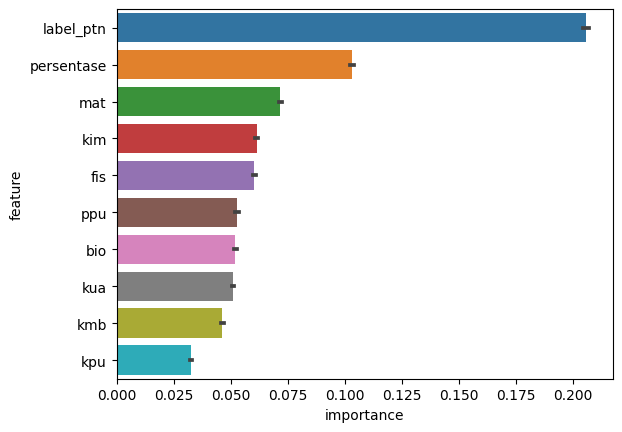

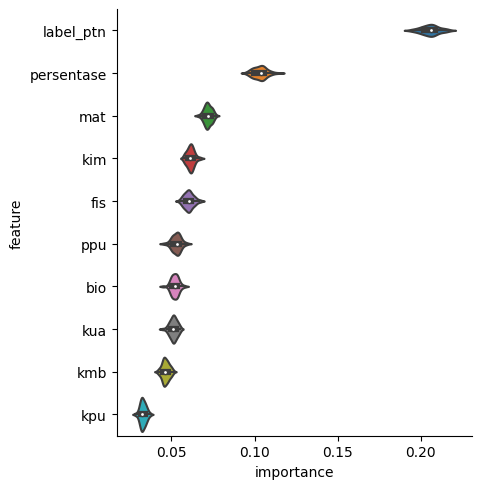

In [58]:
perm = permutation_importance(grid_xgb1, Xte1, yte1, n_repeats=50, random_state=0)
# sns.boxplot(perm["importances"].transpose())
# plt.show()

perm2 = pd.DataFrame({'feature': Xte1.columns.tolist()*50, 
                     'importance': perm["importances"].transpose().reshape(-1)})

sns.barplot(x='importance', y='feature', data=perm2, 
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

plt.show()

In [59]:
## Next Move?
fitur2 = (perm2.groupby("feature")["importance"].mean().sort_values(ascending=False)[:10]).index.to_list()
# fitur2

### Individual and General Shap Values 
**WAY TOOO LONG**, do resample plz <br>
Couldnt do pipeline and grid search; so manually transform variable, then modelling or what? Yeah, kinda.
- Dari individu uji pertama, didapat bahwa faktor yang paling berpengaruh terhadap nilai G3 adalah G1, absences, dan reason. G1 senilai 8 (yang cukup rendah) serta reason = 0 (dekat dari rumah) menyebabkan turunnya nilai dari G3; absences sebesar 2, yang tidak terlalu banyak, meningkatkan nilai dari G3. Dari ketiga faktor tersebut, rekomendasi untuk anak tersebut adalah mengubah mindset dan meningkatkan ketidakabsenan. (G1 gk bisa diubah, absences juga udh bagus, apalagi dong?).
- Dari SHAP values secara general, G1 dan difG berkorelasi positif dengan respon G3. Absences tampak membagongkan; untuk absen sedikit cenderung jelek. Sedangkan untuk gabungan absen sedikit, menengah, dan banyak cenderung menambah var. respon (ya, sepertinya absen berkorelasi dengan variabel lainnya). Dst. Age dan reason lumayan masuk akal.

In [60]:
print(classification_report(grid_xgb1.predict(Xte1), yte1))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2853
           1       0.83      0.85      0.84      2101

    accuracy                           0.86      4954
   macro avg       0.86      0.86      0.86      4954
weighted avg       0.87      0.86      0.86      4954



In [61]:
# mod, dat = mo_data(grid_xgb1, Xte1)
    
#     # individual
# datn = dat.iloc[(3-1):3,:]
# explainer = shap.TreeExplainer(mod, approximate=False)
# shap_values = explainer.shap_values(datn)
# shap.force_plot(explainer.expected_value, shap_values, datn, matplotlib=True, show=False, contribution_threshold=0.1)

In [62]:
# explainer.expected_value

In [63]:
# takes yearssssssssss.
def mo_data(model, data, pre="preprocess", clf="clf"):
#     pre = model.best_estimator_.named_steps[pre]
#     data = pre.transform(data)
#     fitur = [j.split("__")[1] for j in pre.get_feature_names_out()]
    fitur = model.best_estimator_.named_steps[clf].feature_names_in_
    mod = model.best_estimator_.named_steps[clf]
    dat = pd.DataFrame(data, columns=fitur)
    return mod, dat

    
def id_shap2(model, data, pre="preprocess", clf="clf", en = 1):
    mod, dat = mo_data(model, data)
    
    # individual
    datn = dat.iloc[(en-1):en,:]
    explainer = shap.TreeExplainer(mod, approximate=False)
    shap_values = explainer.shap_values(datn)
    return shap.force_plot(explainer.expected_value, shap_values, datn, matplotlib=True, show=False, contribution_threshold=0.1)


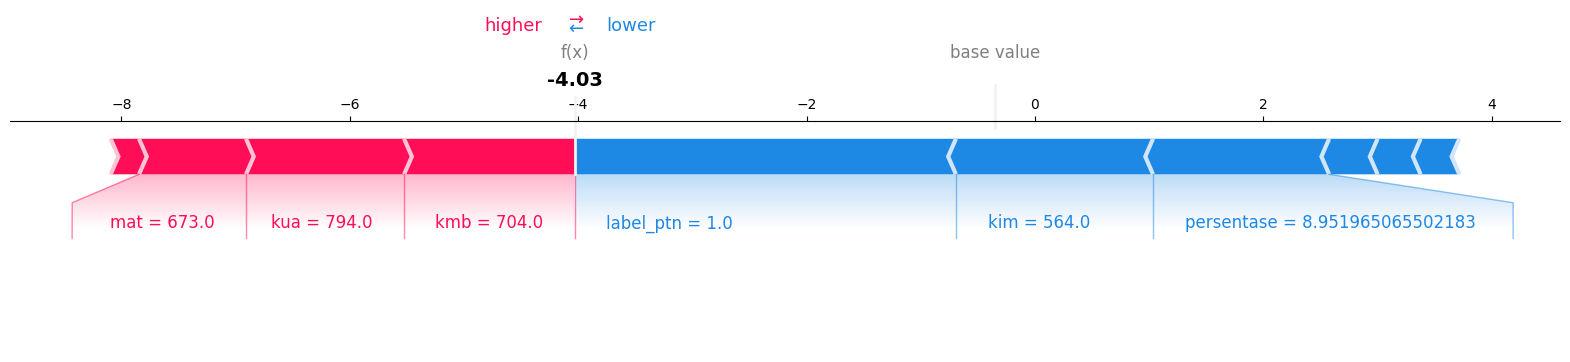

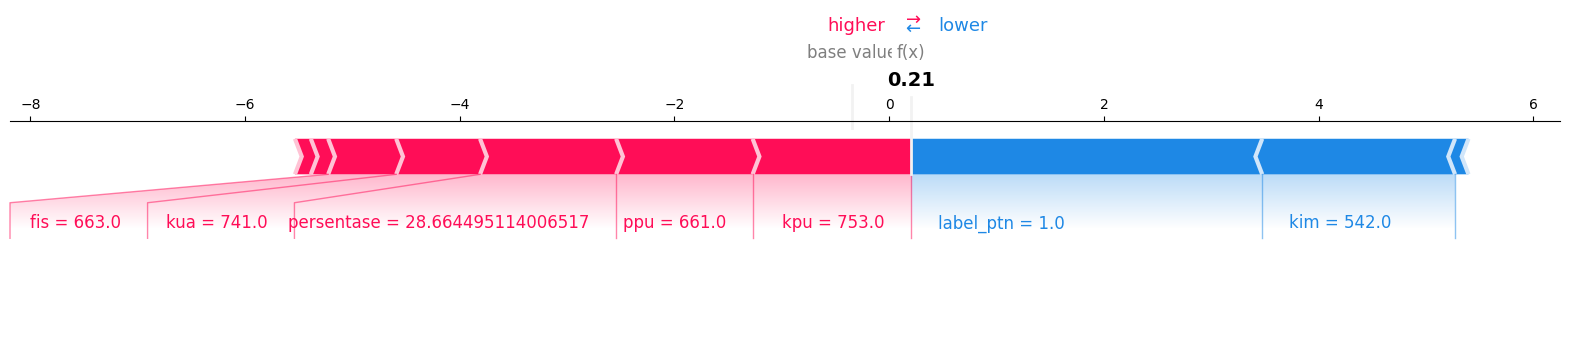

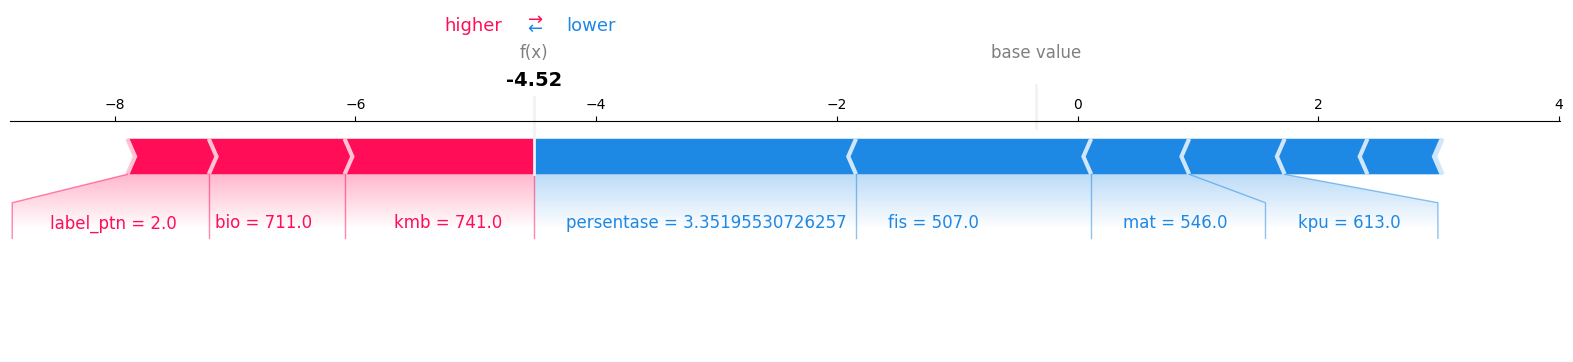

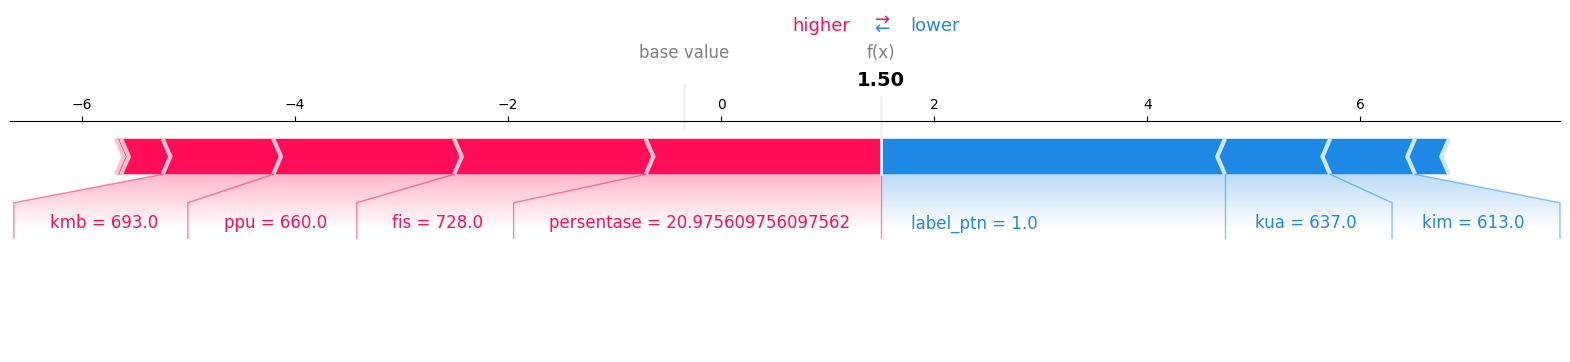

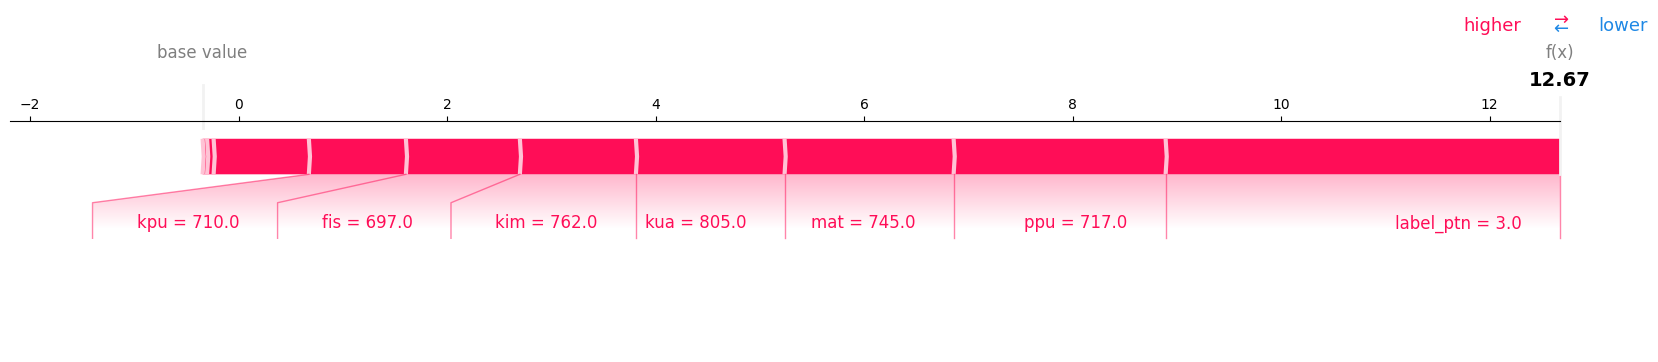

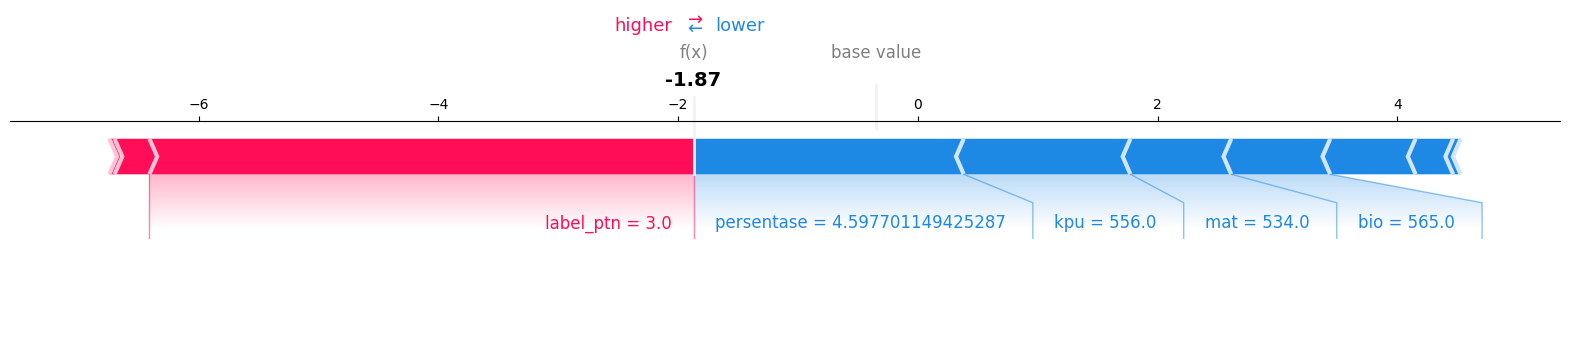

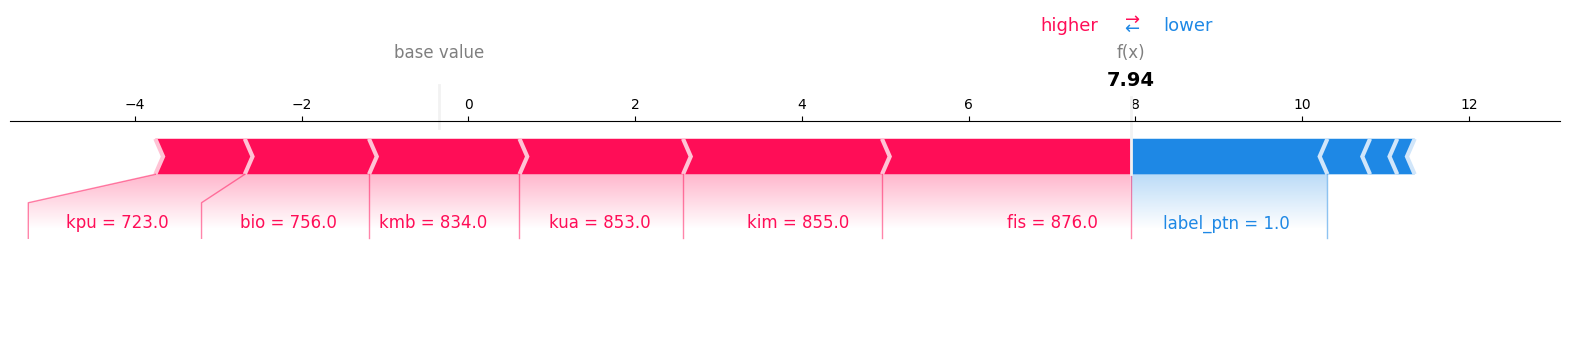

In [64]:
for j in range(3,10):
    id_shap2(grid_xgb1, Xte1, en=j)
    
plt.show()
plt.tight_layout()


### General Shap Values
- shap dep. plots; cant say anything tho.
- do, DO redo.

In [65]:
# def id_shap1(model, data, pre="preprocess", clf="clf", which="all"):
#     mod, dat = mo_data(model, data)
#     shapval = shap.TreeExplainer(mod, approximate=False).shap_values(dat)
#     return shapval[1], dat

# def pl_shap1(val, data):
#     shap.summary_plot(val, data)
#     shap.summary_plot(val, data, plot_type="violin", color='coolwarm')

# def pl_shap2(val, data):
#     fig, axes = plt.subplots(3, 4, figsize=(16, 10))
#     axes = axes.ravel()
#     display(axes)

#     for i, var in enumerate(fitur2):
#         shap.dependence_plot(var, val, data, ax=axes[i], show=False)   
#     plt.tight_layout()

# valx, datx = id_shap1(grid_rf1, Xte1)

In [66]:
# pl_shap1(valx, datx)
# plt.show()

In [67]:
# pl_shap2(valx, datx)
# plt.show()

BATAS SUCI 1

In [68]:
X2 = Xtr2.copy()
y2 = ytr2.copy()

# Define a list of regression models
models = [
    LogisticRegression(random_state=0, max_iter=500),
    RidgeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    XGBClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0),
    LGBMClassifier(random_state=0),
]

res2 = []

for model in models:
    pipa = imbpipeline(steps=[
#         ("preprocess", pre_1),
        ("clf", model)
    ])
    
    # weit, how to do? try append for dataframe
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring={"f1M": "f1_macro","pre":"precision", "roc": "roc_auc"}, refit="pre", verbose=1)
    
    grid_search.fit(X2, y2)
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'Score': grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res2.append(result)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


In [69]:
res2

[{'Model': 'LogisticRegression', 'Score': 0.744161772255315},
 {'Model': 'RidgeClassifier', 'Score': 0.0},
 {'Model': 'RandomForestClassifier', 'Score': 0.8379629629629629},
 {'Model': 'XGBClassifier', 'Score': 0.7263676489577854},
 {'Model': 'HistGradientBoostingClassifier', 'Score': 0.7492090197954941},
 {'Model': 'LGBMClassifier', 'Score': 0.739770944092311}]

### What to DO?
- Yoah, most important things are precision. PRECISION.
- Consider: RF XGB HGB LGB
- FOR 1st needless to do imbalance handling
- Yeah.

> ## XGB
1. run w/ NULL param_grid &rarr;  0.79278
            'clf__n_estimators': [100, 500],
            'clf__learning_rate': [0.1, 0.01, 0.3], 
            'clf__max_depth': [3,6,9,None],
            'clf__gamma': [0, 0.1, 1, 10],
            'clf__min_child_weight': [1, 5, 10],
            
1. First Params 0.8220596781809597   
    Best Parameter {'clf__gamma': 1, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_child_weight': 1, 'clf__n_estimators': 500}
    
1. Last Params  0.823764476310243    
    Best Parameter {'clf__gamma': 1, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_weight': 2, 'clf__n_estimators': 500}

In [70]:
# xgb1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", XGBClassifier(random_state=0))
# ])


# param_grid = {
#     'clf__n_estimators': [500],
#     'clf__learning_rate': [ 0.01], 
#     'clf__max_depth': [2],
#     'clf__gamma': [1],
#     'clf__min_child_weight': [2],
    
# }


# grid_xgb1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=rkf, 
#                          scoring={"roc": "roc_auc"}, 
#                          verbose = 3, refit="roc")


# # Melakukan tuning hyperparameter
# grid_xgb1.fit(X1, y1)


# # Mendapatkan model terbaik
# print("Best Parameter", grid_xgb1.best_params_)
# print("Best Scorer", grid_xgb1.best_score_)

In [71]:
# print(pd.DataFrame(grid_xgb1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_xgb1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_xgb1.best_estimator_.get_params()["clf"].get_params()

> ## Random Forest
1. Base: 0.821251
        'clf__n_estimators': [100, 300],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 5, 10],
        'clf__max_features': ["sqrt", "log2"],
        'clf__max_depth': [10, 20, None],
1. What? 0.8287477   
    Best Parameter {'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}

1. Last 0.828747728604708    
    Best Parameter {'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}

1. Real Last The Same.

In [72]:
rf2 = imbpipeline(steps=[
#     ("preprocess", pre_1),
    ("clf", RandomForestClassifier(random_state=0))
])


param_grid = {
#     'clf__n_estimators': [100],
#     'clf__min_samples_split': [10],
#     'clf__min_samples_leaf': [2],
#     'clf__max_features': ["sqrt"],
#     'clf__max_depth': [20],

}

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=rkf, 
                        scoring={"roc": "roc_auc"}, 
                        verbose = 3, refit="roc")


# Melakukan tuning hyperparameter
grid_rf2.fit(X2, y2)


# Mendapatkan model terbaik
print("Best Parameter", grid_rf2.best_params_)
print("Best Scorer", grid_rf2.best_score_)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END .............................. roc: (test=0.961) total time=   1.8s
[CV 2/6] END .............................. roc: (test=0.953) total time=   1.8s
[CV 3/6] END .............................. roc: (test=0.947) total time=   1.8s
[CV 4/6] END .............................. roc: (test=0.952) total time=   1.8s
[CV 5/6] END .............................. roc: (test=0.946) total time=   1.8s
[CV 6/6] END .............................. roc: (test=0.954) total time=   1.8s
Best Parameter {}
Best Scorer 0.952016847735997


In [73]:
# print(pd.DataFrame(grid_rf1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_rf1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_rf1.best_estimator_.get_params()["clf"].get_params()

> ## LGBM
1. Base Scorer 0.7898796393647651
        'clf__learning_rate': [0.1, 0.5, 0.01],
        'clf__n_estimators': [100, 300],
        'clf__max_depth': [-1, 3, 10],
        'clf__mn_child_samples': [10, 20, 50],
        'clf__colsample_bytree': [0.8, 0.9, 1],

1. First 0.8253315243160779    
Best Parameter {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_child_samples': 10, 'clf__n_estimators': 300}

1. Second 0.827769464053789   
Best Parameter {'clf__colsample_bytree': 0.6, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 3, 'clf__n_estimators': 500}

1. Eak Best Scorer 0.8287408874222376   
Best Parameter {'clf__colsample_bytree': 0.4, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500}

1. Eak   0.8299094840999874    
Best Parameter {'clf__colsample_bytree': 0.3, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500} 

Best Parameter {'clf__colsample_bytree': 0.5, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__min_child_samples': 2, 'clf__n_estimators': 500, 'clf__num_leaves': 5}
Best Scorer 0.8276160436343504

In [74]:
# lg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", LGBMClassifier(random_state=0))
# ])


# param_grid = {
#     'clf__learning_rate': [0.01],
#     'clf__n_estimators': [500],
#     'clf__max_depth': [2],
#     'clf__min_child_samples': [2],
#     'clf__colsample_bytree': [0.5],
#     'clf__num_leaves':[5]
# }


# grid_lg1 = GridSearchCV(estimator=lg1, param_grid=param_grid, cv=rkf, 
#                         scoring={"roc": "roc_auc"}, 
#                         verbose = 3, refit="roc")

# # Melakukan tuning hyperparameter
# grid_lg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_lg1.best_params_)
# print("Best Scorer", grid_lg1.best_score_)

In [75]:
# # print(pd.DataFrame(grid_lg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_lg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_lg1.best_estimator_.get_params()["clf"].get_params()

> ## HGBoosting
1. Makin makin 0.8012324804372858
        'clf__min_samples_leaf':[10, 20, 40],
        'clf__learning_rate': [0.05, 0.1, 0.01, 0.5],
        'clf__max_bins': [100, 200, 255],
        'clf__max_depth': [3, 10, 20, None],
        'clf__l2_regularization':[0, 0.01, 0.1, 1]

1. Eak  0.8261545339062502
Best Parameter {'clf__min_samples_leaf': 10, 'clf__max_depth': 3, 'clf__max_bins': 200, 'clf__learning_rate': 0.05, 'clf__l2_regularization': 1}

In [76]:
# hg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", HistGradientBoostingClassifier(random_state=0))
# ])

# param_grid = {
#     'clf__min_samples_leaf':[10],
#     'clf__learning_rate': [0.05],
#     'clf__max_bins': [200],
#     'clf__max_depth': [3],
#     'clf__l2_regularization':[1]
# }

# grid_hg1 = RandomizedSearchCV(estimator=hg1, param_distributions=param_grid, cv=rkf, 
#                               scoring={"roc": "roc_auc"}, 
#                               verbose = 3, refit="roc", random_state=0, n_iter=200)

# # Melakukan tuning hyperparameter
# grid_hg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_hg1.best_params_)
# print("Best Scorer", grid_hg1.best_score_)

In [77]:
# # print(pd.DataFrame(grid_hg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_hg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_hg1.best_estimator_.get_params()["clf"].get_params()

## Feature Importance and Performance Test Set
**Best Model: LGBM**

### In-Model FI

In [78]:
print(classification_report(grid_rf2.predict(Xte2), yte2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7671
           1       0.08      0.91      0.14        23

    accuracy                           0.97      7694
   macro avg       0.54      0.94      0.56      7694
weighted avg       1.00      0.97      0.98      7694



In [79]:

# fitur = [j.split("__")[1] for j in grid_lg1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
# imp = pd.DataFrame({'feature': fitur, 
#                      'importance': grid_lg1.best_estimator_.named_steps["clf"].feature_importances_})

# imp["importance"] = imp["importance"]/imp["importance"].sum()*100

# imp = imp.sort_values('importance', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(6, 4))
# sns.barplot(x='importance', y='feature', data=imp)

The figure layout has changed to tight


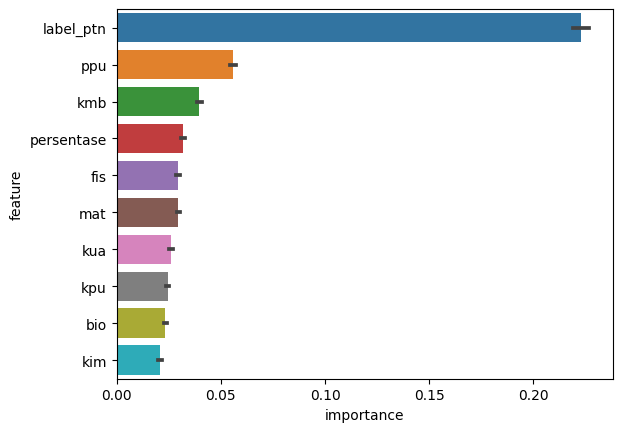

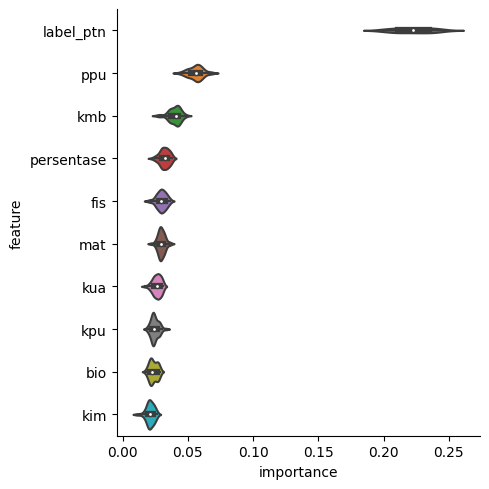

In [80]:
perm = permutation_importance(grid_rf2, Xte2, yte2, n_repeats=50, random_state=0)
# sns.boxplot(perm["importances"].transpose())
# plt.show()

perm2 = pd.DataFrame({'feature': Xte2.columns.tolist()*50, 
                     'importance': perm["importances"].transpose().reshape(-1)})

sns.barplot(x='importance', y='feature', data=perm2, 
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

plt.show()

In [81]:
## Next Move?
fitur2 = (perm2.groupby("feature")["importance"].mean().sort_values(ascending=False)[:10]).index.to_list()
# fitur2

### Individual and General Shap Values 
**WAY TOOO LONG**, do resample plz <br>
Couldnt do pipeline and grid search; so manually transform variable, then modelling or what? Yeah, kinda.
- Dari individu uji pertama, didapat bahwa faktor yang paling berpengaruh terhadap nilai G3 adalah G1, absences, dan reason. G1 senilai 8 (yang cukup rendah) serta reason = 0 (dekat dari rumah) menyebabkan turunnya nilai dari G3; absences sebesar 2, yang tidak terlalu banyak, meningkatkan nilai dari G3. Dari ketiga faktor tersebut, rekomendasi untuk anak tersebut adalah mengubah mindset dan meningkatkan ketidakabsenan. (G1 gk bisa diubah, absences juga udh bagus, apalagi dong?).
- Dari SHAP values secara general, G1 dan difG berkorelasi positif dengan respon G3. Absences tampak membagongkan; untuk absen sedikit cenderung jelek. Sedangkan untuk gabungan absen sedikit, menengah, dan banyak cenderung menambah var. respon (ya, sepertinya absen berkorelasi dengan variabel lainnya). Dst. Age dan reason lumayan masuk akal.

In [82]:
# takes yearssssssssss.
def mo_data(model, data, pre="preprocess", clf="clf"):
#     pre = model.best_estimator_.named_steps[pre]
#     data = pre.transform(data)
#     fitur = [j.split("__")[1] for j in pre.get_feature_names_out()]
    fitur = model.best_estimator_.named_steps[clf].feature_names_in_
    mod = model.best_estimator_.named_steps[clf]
    dat = pd.DataFrame(data, columns=fitur)
    return mod, dat

    
def id_shap2(model, data, pre="preprocess", clf="clf", en = 1):
    mod, dat = mo_data(model, data)
    
    # individual
    datn = dat.iloc[(en-1):en,:]
    explainer = shap.TreeExplainer(mod, approximate=False)
    shap_values = explainer.shap_values(datn)
    return shap.force_plot(explainer.expected_value[1], shap_values[1], datn, matplotlib=True, show=False, contribution_threshold=0.1)

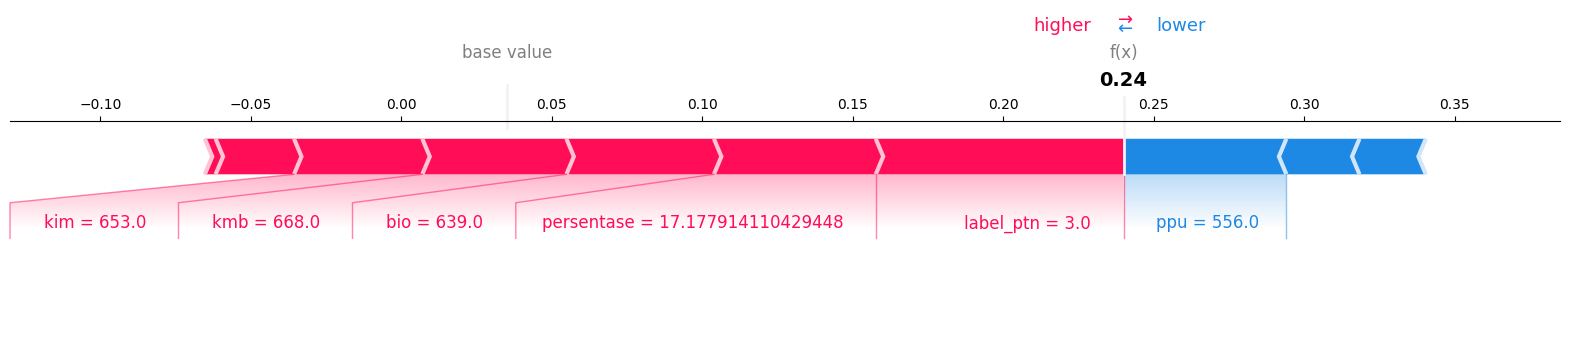

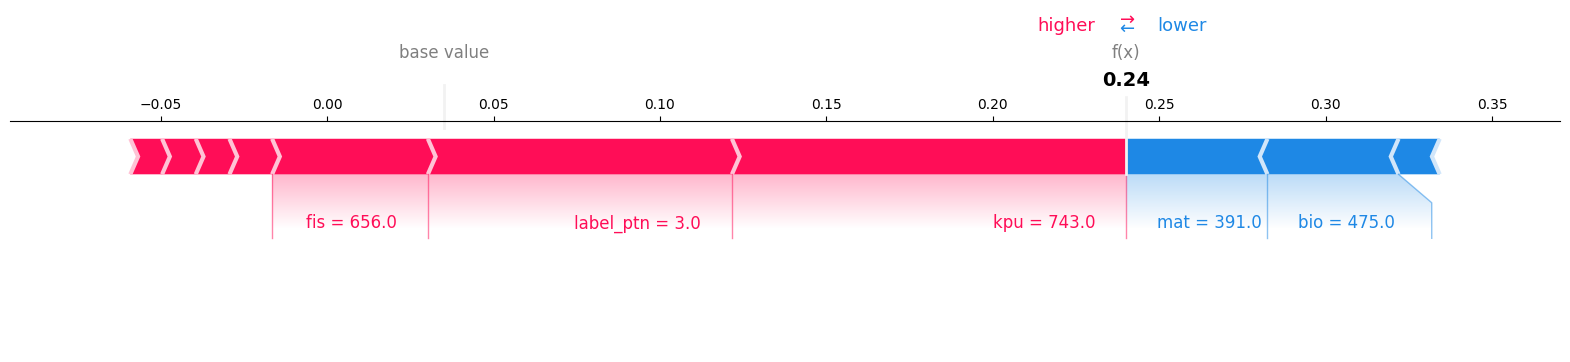

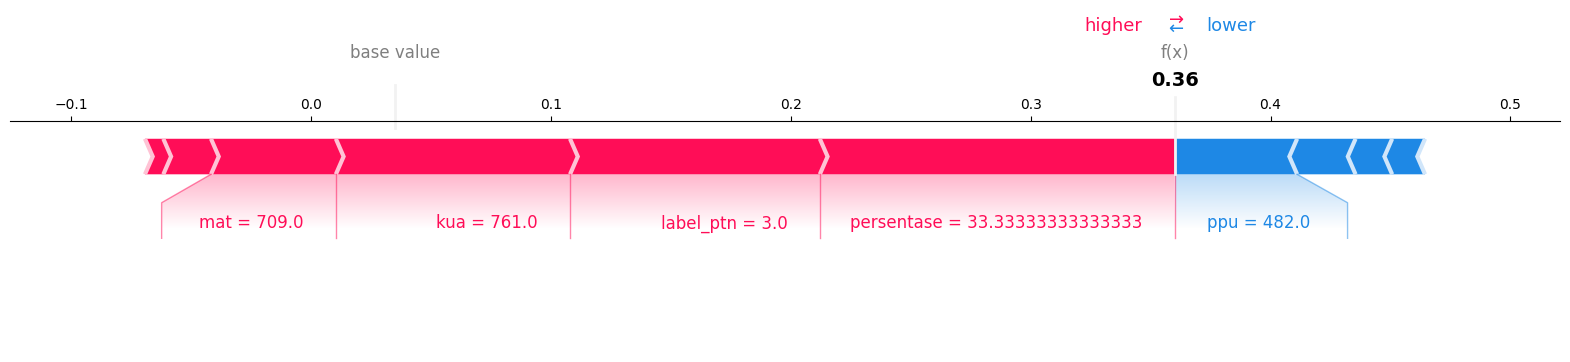

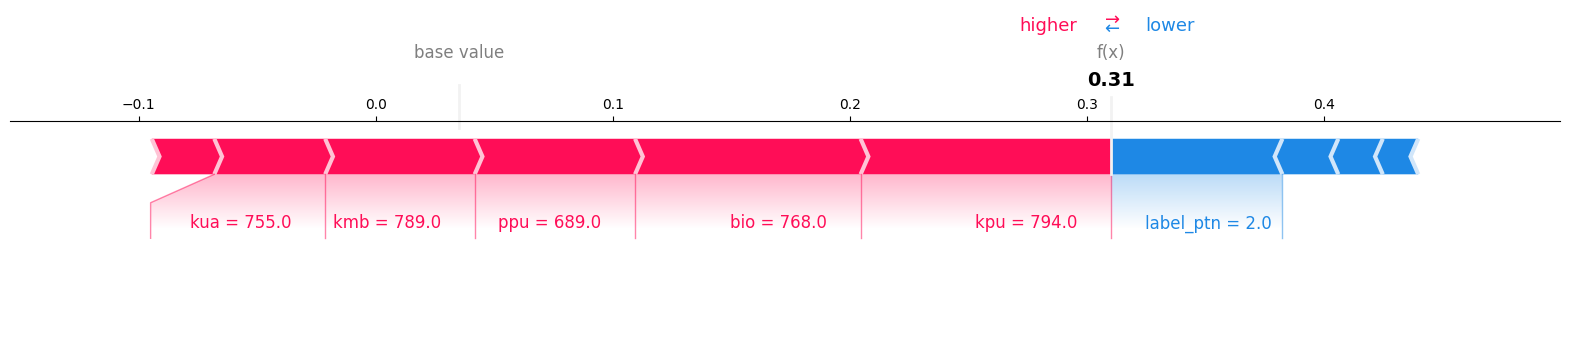

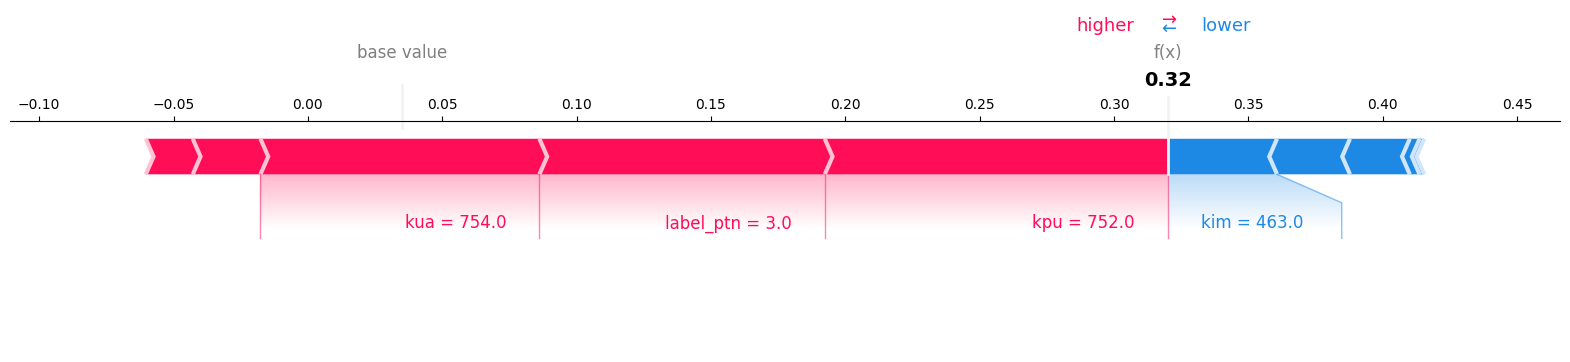

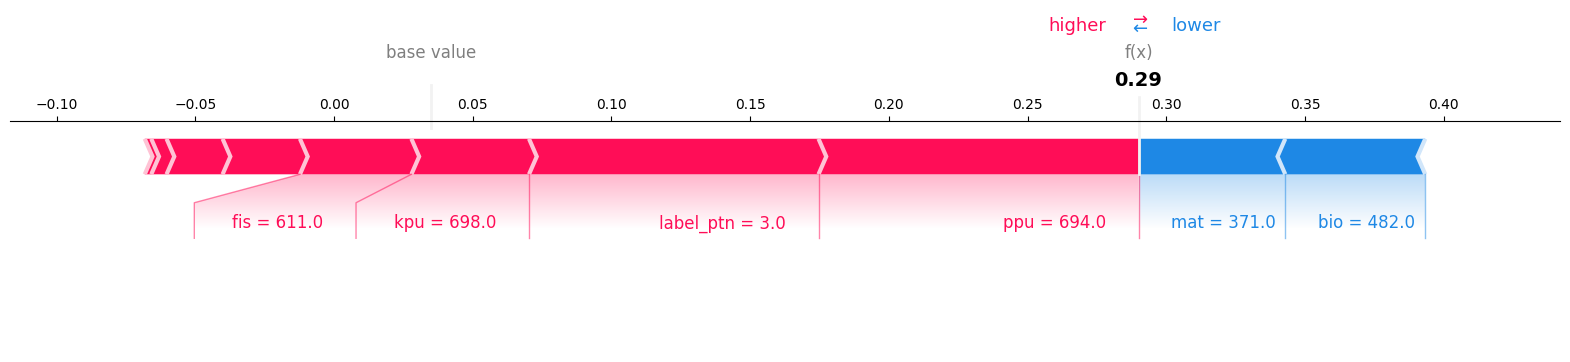

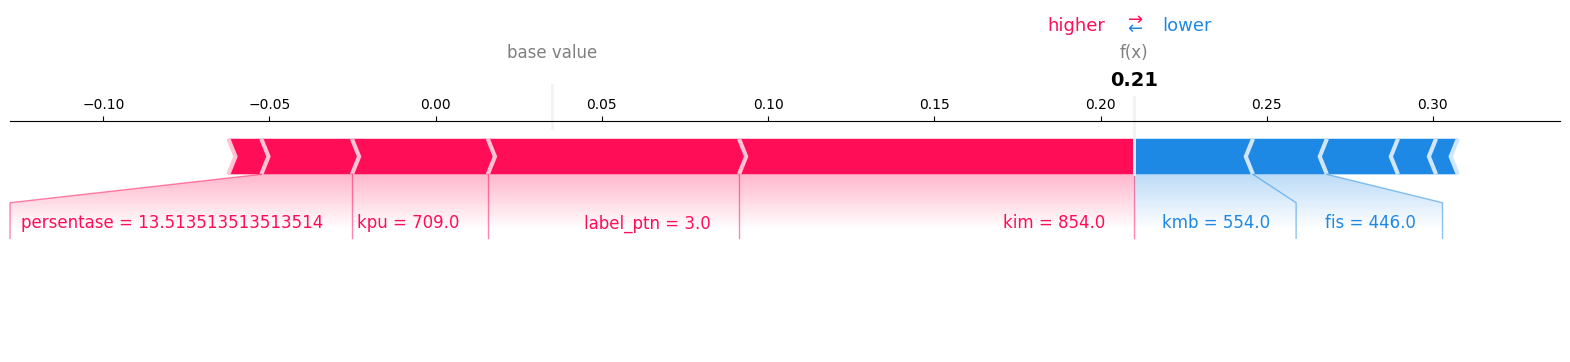

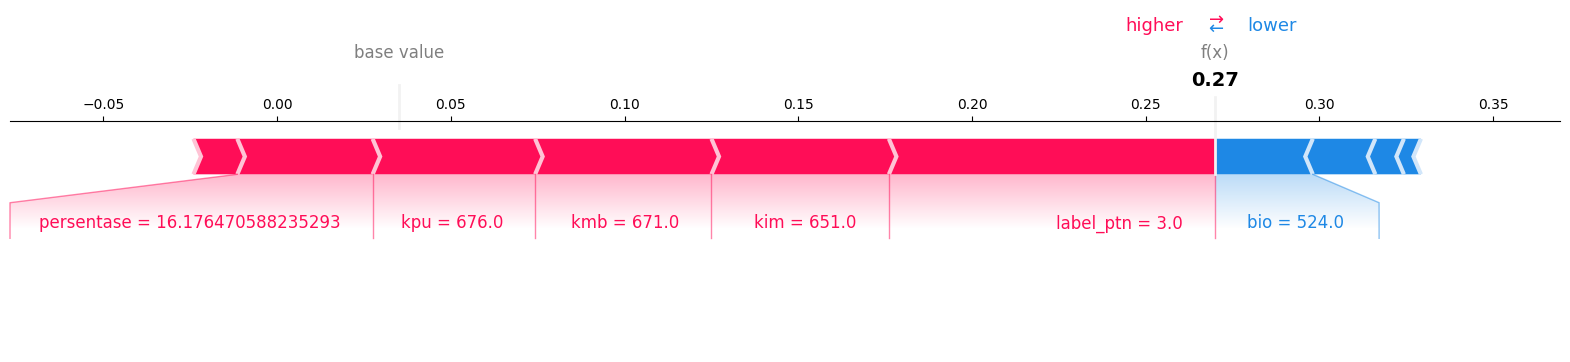

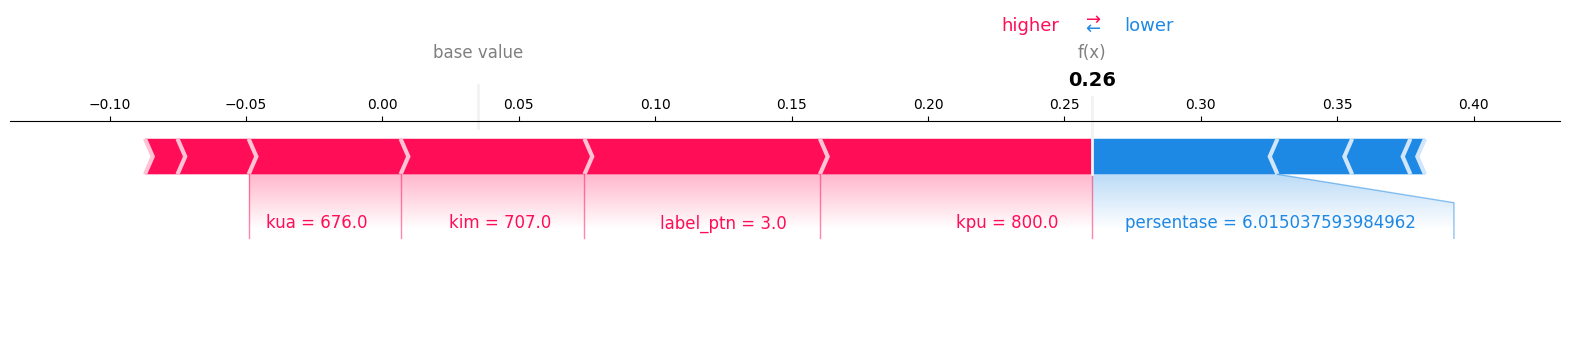

In [83]:
for j in np.where(grid_rf2.predict_proba(Xte2)[:,1]>0.2)[0][1:10]+1:
    id_shap2(grid_rf2, Xte2, en=j)

plt.show()
plt.tight_layout()

BATAS SUCI 2

### Threshold-Moving
\dibalik

In [84]:
def fLabel(pos_prob, thd):
    return (pos_prob >= thd).astype("int")

def fThresh(X, y, model):
    yprob = model.predict_proba(X)[:,1]
    thresh = np.arange(0, 1, 0.01) #UBAH BUN.
    cm = [confusion_matrix(y, fLabel(yprob, t)) for t in thresh]
    
    # tn, fp, fn, tp
    am = np.array(cm).reshape((thresh.shape[0],4))[:,0:4]
    matrik = pd.DataFrame(am, columns=["tn", "fp", "fn", "tp"])
    matrik["thresh"] = thresh
    
    # f1 micro dari formula manual, cari max, yyy.
    matrik["acc"] = matrik[["tn", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)

    matrik["sen"] = matrik[["tp"]].sum(1) /  matrik[["tp", "fn"]].sum(1)
    matrik["pre"] = matrik[["tp"]].sum(1) /  matrik[["tp", "fp"]].sum(1)
    matrik["spe"] = matrik[["tn"]].sum(1) /  matrik[["tn", "fp"]].sum(1)
    matrik["bal"] = matrik[["sen", "spe"]].mean(1)

    matrik["f1M"] = 2/(1/matrik["sen"] + 1/matrik["pre"])    
    matrik["f50M"] = 1.25/(0.25/matrik["sen"] + 1/matrik["pre"])     
    matrik["f25M"] = (1+.25**2)/(0.25**2/matrik["sen"] + 1/matrik["pre"])
    
#     matrik["pro"] = (matrik[["tn", "fp", "fn", "tp"]]*[10,0,-100,0]).sum(1) / matrik[["tn", "tp", "fn", "fp"]].sum(1)
#     matrik["check-cent"] = 100* matrik[["fp", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)
#     matrik["riil-cent"] = 100* matrik[["fn", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)
    
    # omit zeros tp and tn
    pos = (matrik["tp"] == 0) + (matrik["tn"] == 0) == False
    
    return matrik.loc[pos,:].sort_values("sen", ascending=False).reset_index(drop=True)

In [85]:
# ekstrem: max profit, max recall/sens, max balanced acc, acc, spe, por eak.
dftm = fThresh(Xte2, yte2, grid_rf2)
tabel = dftm.iloc[[dftm.sen.argmax(), dftm.bal.argmax(), dftm.acc.argmax(), dftm.f50M.argmax(), dftm.f25M.argmax(), dftm.f1M.argmax(), dftm.spe.argmax(), np.where(dftm.thresh==0.5)[0][0]] ,:].sort_values("thresh")
round(tabel, 3)

tn    fp   fn   tp  thresh    acc    sen    pre    spe    bal    f1M  \
0   3931  3493    0  270    0.01  0.546  1.000  0.072  0.529  0.765  0.134   
4   6076  1348   15  255    0.05  0.823  0.944  0.159  0.818  0.881  0.272   
25  7316   108  131  139    0.26  0.969  0.515  0.563  0.985  0.750  0.538   
32  7379    45  177   93    0.33  0.971  0.344  0.674  0.994  0.669  0.456   
33  7386    38  183   87    0.34  0.971  0.322  0.696  0.995  0.659  0.441   
40  7417     7  222   48    0.41  0.970  0.178  0.873  0.999  0.588  0.295   
49  7420     4  249   21    0.50  0.967  0.078  0.840  0.999  0.539  0.142   
68  7424     0  268    2    0.69  0.965  0.007  1.000  1.000  0.504  0.015   

     f50M   f25M  
0   0.088  0.076  
4   0.191  0.167  
25  0.552  0.560  
32  0.566  0.638  
33  0.565  0.652  
40  0.490  0.710  
49  0.284  0.533  
68  0.036  0.113

In [86]:
dftm[dftm.pre > 0.6]

tn  fp   fn   tp  thresh       acc       sen       pre       spe  \
29  7351  73  158  112    0.30  0.969977  0.414815  0.605405  0.990167   
30  7363  61  164  106    0.31  0.970756  0.392593  0.634731  0.991783   
31  7369  55  170  100    0.32  0.970756  0.370370  0.645161  0.992592   
32  7379  45  177   93    0.33  0.971146  0.344444  0.673913  0.993939   
33  7386  38  183   87    0.34  0.971276  0.322222  0.696000  0.994881   
34  7394  30  191   79    0.35  0.971276  0.292593  0.724771  0.995959   
35  7394  30  191   79    0.36  0.971276  0.292593  0.724771  0.995959   
36  7401  23  200   70    0.37  0.971016  0.259259  0.752688  0.996902   
37  7403  21  202   68    0.38  0.971016  0.251852  0.764045  0.997171   
38  7406  18  205   65    0.39  0.971016  0.240741  0.783133  0.997575   
39  7408  16  209   61    0.40  0.970756  0.225926  0.792208  0.997845   
40  7417   7  222   48    0.41  0.970237  0.177778  0.872727  0.999057   
41  7417   7  222   48    0.42  0.970237  0.177778  0.872727  0.999057   
42  7417   7  225   45    0.43  0.969847  0.166667  0.865385  0.999057   
43  7417   7  228   42    0.44  0.969457  0.155556  0.857143  0.999057   
44  7418   6  230   40    0.45  0.969327  0.148148  0.869565  0.999192   
45  7418   6  232   38    0.46  0.969067  0.140741  0.863636  0.999192   
46  7419   5  241   29    0.47  0.968027  0.107407  0.852941  0.999327   
47  7419   5  241   29    0.48  0.968027  0.107407  0.852941  0.999327   
48  7420   4  244   26    0.49  0.967767  0.096296  0.866667  0.999461   
49  7420   4  249   21    0.50  0.967117  0.077778  0.840000  0.999461   
50  7422   2  249   21    0.51  0.967377  0.077778  0.913043  0.999731   
51  7422   2  250   20    0.52  0.967247  0.074074  0.909091  0.999731   
52  7422   2  252   18    0.53  0.966987  0.066667  0.900000  0.999731   
53  7422   2  253   17    0.54  0.966857  0.062963  0.894737  0.999731   
54  7423   1  254   16    0.55  0.966857  0.059259  0.941176  0.999865   
55  7423   1  258   12    0.56  0.966337  0.044444  0.923077  0.999865   
56  7423   1  261    9    0.57  0.965947  0.033333  0.900000  0.999865   
57  7423   1  261    9    0.58  0.965947  0.033333  0.900000  0.999865   
58  7423   1  262    8    0.59  0.965818  0.029630  0.888889  0.999865   
59  7423   1  262    8    0.60  0.965818  0.029630  0.888889  0.999865   
60  7423   1  263    7    0.61  0.965688  0.025926  0.875000  0.999865   
61  7423   1  263    7    0.62  0.965688  0.025926  0.875000  0.999865   
62  7423   1  264    6    0.65  0.965558  0.022222  0.857143  0.999865   
63  7423   1  264    6    0.64  0.965558  0.022222  0.857143  0.999865   
64  7423   1  264    6    0.63  0.965558  0.022222  0.857143  0.999865   
65  7423   1  266    4    0.66  0.965298  0.014815  0.800000  0.999865   
66  7423   1  267    3    0.67  0.965168  0.011111  0.750000  0.999865   
67  7423   1  267    3    0.68  0.965168  0.011111  0.750000  0.999865   
68  7424   0  268    2    0.69  0.965168  0.007407  1.000000  1.000000   
69  7424   0  268    2    0.70  0.965168  0.007407  1.000000  1.000000   
70  7424   0  268    2    0.71  0.965168  0.007407  1.000000  1.000000   
71  7424   0  269    1    0.72  0.965038  0.003704  1.000000  1.000000   

         bal       f1M      f50M      f25M  
29  0.702491  0.492308  0.554455  0.589474  
30  0.692188  0.485126  0.565032  0.612508  
31  0.681481  0.470588  0.561798  0.618182  
32  0.669192  0.455882  0.565693  0.638015  
33  0.658552  0.440506  0.564935  0.651542  
34  0.644276  0.416887  0.559490  0.666832  
35  0.644276  0.416887  0.559490  0.666832  
36  0.628081  0.385675  0.545171  0.676906  
37  0.624512  0.378830  0.543131  0.682409  
38  0.619158  0.368272  0.539867  0.691489  
39  0.611885  0.351585  0.527682  0.690413  
40  0.588417  0.295385  0.489796  0.709565  
41  0.588417  0.295385  0.489796  0.709565  
42  0.582862  0.279503  0.470711  0.694192  
43  0.577306  0.263323  0.450644  0.677419  
44  0.573670  0.253165  0.440